## **Section 0** - ESSENTIALS: Install and load libraries
- Even though we clone our own github repo to access our developed modules, we still to install the library dependencies.

In [ ]:
!pip install rarfile
!pip install gitpython
!pip install ta
!pip install hurst
!pip install catboost
# pip install bayes_opt

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=b09a5cf86479a7160bb5cb7963f40c129df2b96bc217bc07b61558994ba80f53
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


### Clone/Reclone the repo to pull in the latest updates.
- When you need to do this, uncomment the below code and run.

# Introduction:
- This notebook pulls in minutely data from Github repo. **Class TickerData** and its functions help to do that.
https://github.com/laughingbud/capstone/tree/main/Data
- Exploratory research is then conducted on the data using the **class Exploratory** and its functions
- Technical indicators are defined and built in the **class Strategy**. The function calculate_analytics takes the return series of any strategy and returns sharpe ratio, annual return, vol,etc type of analytics.
## Work so far:
Note: Only tested 'Bank Nifty' ticker but can be expanded later
- Till now we explored mean reversion strategy using Bollinger bands strategy and did robustness testing by varying look back window, band size and implementation lag(shift signal by 2 or more).
- We also explored seasonality strategy by looking at different seasonality windows where autocorrelations are statistically signficant.
## Next step:
- Develop strategies (mean reversion or trend) using other technical indicators. We are aiming to have around 12-15 technical indicator strategies at the minimum.
- Develop a cross sectional strategy (elaborated on the email to Prof.Rito) with a bigger universe.
- If still have time, explore ML based strategy using all these technical indicators to forecast return minutes (5mins,10,15,30, 1hour, 4hour,upto daily) ahead.


In [ ]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib

In [ ]:
repo_url = 'https://github.com/laughingbud/capstone.git'
repo_name = re.search(r'/([^/]+)\.git$', repo_url).group(1)

if os.path.exists(f'/content/{repo_name}'):
    %cd /content/capstone
    !git pull
    import importlib
    import Exploratory
    importlib.reload(Exploratory)
    import Strategy
    importlib.reload(Strategy)
    import TickerData
    importlib.reload(TickerData)
    # !rm -rf '/content/capstone'
    # %cd content
else:
    %cd /content/
    !git clone https://github.com/laughingbud/capstone.git

/content
Cloning into 'capstone'...
remote: Enumerating objects: 14997, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 14997 (delta 132), reused 266 (delta 128), pack-reused 14726 (from 1)
Receiving objects: 100% (14997/14997), 1.07 GiB | 16.76 MiB/s, done.
Resolving deltas: 100% (204/204), done.
Updating files: 100% (15839/15839), done.


# 1. Classes
-  TickerData - mainly for data import from YF and storing in git repo
-  Exploratory - For exploring interesting patterns and characteristics about data
-  Strategy - For strategy and feature creation

In [ ]:
%cd /content/capstone
from TickerData import TickerData
from Exploratory import Exploratory
from Strategy import Strategy

/content/capstone


### Import data

In [ ]:
repo_url = 'https://github.com/laughingbud/capstone'
td = TickerData(repo_url=repo_url)

In [ ]:
minutely_tickers,ticker_dict = td.get_minutely_tickers()
# ticker_dict

15817 CSV files found: ['/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/POWERGRIDAUG23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/DLFAUG23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/NATIONALUMAUG23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/INDUSTOWERJUL23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/SAILJUN23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/TECHMAUG23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/M_MAUG23.csv', '/content/capstone/Data/Futures - June 2023 - Missing Data/NSE_FUT_1MIN_20230623/Contract Futures/NAUKRIJUL23.csv', '/content/capstone/Data/Futures - June 2023 - 

In [ ]:
bank_nifty_f1 = td.load_minutely_data(ticker='BANKNIFTY',filter='F1')

Reading CSV file: /content/capstone/Data/Futures IEOD-March 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-February 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-January 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-August 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-June 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-November 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-October 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-September 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-February 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-January 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-November 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-December 2023/BANKNIFT

In [ ]:
bank_nifty_f1.head()

,ticker,open,high,low,close,volume,o/i,return
datetime,,,,,,,,
2022-01-03 09:15:00,BANKNIFTY_F1,36621.00,36621.00,35708.05,35811.85,82603,2347925,0.000000
2022-01-03 09:16:00,BANKNIFTY_F1,35813.95,35825.75,35798.70,35798.70,38900,2347925,-0.000367
2022-01-03 09:17:00,BANKNIFTY_F1,35796.55,35796.90,35757.40,35782.60,28775,2368975,-0.000450
2022-01-03 09:18:00,BANKNIFTY_F1,35782.60,35834.25,35782.60,35834.25,28900,2368975,0.001442
2022-01-03 09:19:00,BANKNIFTY_F1,35830.50,35839.65,35823.40,35835.00,28275,2368975,0.000021


In [ ]:
minutely_tickers # Show all tickers

['AARTIIND',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ACC',
 'ADANIENT',
 'ADANIPORTS',
 'ALKEM',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASHOKLEY',
 'ASIANPAINT',
 'ASTRAL',
 'ATUL',
 'AUBANK',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BALKRISIND',
 'BALRAMCHIN',
 'BANDHANBNK',
 'BANKBARODA',
 'BANKNIFTY',
 'BATAINDIA',
 'BEL',
 'BERGEPAINT',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BOSCHLTD',
 'BPCL',
 'BRITANNIA',
 'BSOFT',
 'CANBK',
 'CANFINHOME',
 'CHAMBLFERT',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COFORGE',
 'COLPAL',
 'CONCOR',
 'COROMANDEL',
 'CROMPTON',
 'CUB',
 'CUMMINSIND',
 'DABUR',
 'DALBHARAT',
 'DEEPAKNTR',
 'DELTACORP',
 'DIVISLAB',
 'DIXON',
 'DLF',
 'DRREDDY',
 'EICHERMOT',
 'ESCORTS',
 'EXIDEIND',
 'FEDERALBNK',
 'FINNIFTY',
 'GAIL',
 'GLENMARK',
 'GMRINFRA',
 'GNFC',
 'GODREJCP',
 'GODREJPROP',
 'GRANULES',
 'GRASIM',
 'GUJGASLTD',
 'HAL',
 'HAVELLS',
 'HCLTECH',
 'HDFC',
 'HDFCAMC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO'

In [ ]:
# index_tickers
index_tickers = [x for x in minutely_tickers if 'NIFTY' in x]
print('Index futures tickers:',index_tickers)

Index futures tickers: ['BANKNIFTY', 'FINNIFTY', 'MIDCPNIFTY', 'NIFTY']


In [ ]:
equity_tickers = [x for x in minutely_tickers if 'NIFTY' not in x]
print('Equity futures tickers:',equity_tickers)

Equity futures tickers: ['AARTIIND', 'ABB', 'ABBOTINDIA', 'ABCAPITAL', 'ABFRL', 'ACC', 'ADANIENT', 'ADANIPORTS', 'ALKEM', 'AMBUJACEM', 'APOLLOHOSP', 'APOLLOTYRE', 'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ATUL', 'AUBANK', 'AUROPHARMA', 'AXISBANK', 'BAJAJFINSV', 'BAJFINANCE', 'BALKRISIND', 'BALRAMCHIN', 'BANDHANBNK', 'BANKBARODA', 'BATAINDIA', 'BEL', 'BERGEPAINT', 'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'BSOFT', 'CANBK', 'CANFINHOME', 'CHAMBLFERT', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COFORGE', 'COLPAL', 'CONCOR', 'COROMANDEL', 'CROMPTON', 'CUB', 'CUMMINSIND', 'DABUR', 'DALBHARAT', 'DEEPAKNTR', 'DELTACORP', 'DIVISLAB', 'DIXON', 'DLF', 'DRREDDY', 'EICHERMOT', 'ESCORTS', 'EXIDEIND', 'FEDERALBNK', 'GAIL', 'GLENMARK', 'GMRINFRA', 'GNFC', 'GODREJCP', 'GODREJPROP', 'GRANULES', 'GRASIM', 'GUJGASLTD', 'HAL', 'HAVELLS', 'HCLTECH', 'HDFC', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDCOPPER', 'HINDPETRO', 'HINDUNILVR', 'IBULHSGFIN', 'ICICIBANK'

In [ ]:
print(f'Total number of futures tickers: {len(minutely_tickers)}')
print(f'Total number of index futures tickers: {len(index_tickers)}')
print(f'Total number of equity futures tickers: {len(equity_tickers)}')

Total number of futures tickers: 186
Total number of index futures tickers: 4
Total number of equity futures tickers: 182


In [ ]:
data_summary = pd.DataFrame(ticker_dict).T
data_summary.index.name = 'Tickers'
data_summary.tail()

,files,months,n_months,n_files
Tickers,,,,
VEDL,[/content/capstone/Data/Futures IEOD-March 202...,"[Futures IEOD-August 2022, Futures IEOD-August...",24,72
VOLTAS,[/content/capstone/Data/Futures IEOD-March 202...,"[Futures IEOD-August 2022, Futures IEOD-August...",24,72
WIPRO,[/content/capstone/Data/Futures IEOD-March 202...,"[Futures IEOD-August 2022, Futures IEOD-August...",24,72
ZEEL,[/content/capstone/Data/Futures IEOD-March 202...,"[Futures IEOD-August 2022, Futures IEOD-August...",24,72
ZYDUSLIFE,[/content/capstone/Data/Futures IEOD-March 202...,"[Futures IEOD-August 2022, Futures IEOD-August...",22,66


#### Of the 186 unique tickers, almost all of them have 24 months of data, except seven (left-most in the above chart) firms - PVRINOX, LTIM, SRIRAMFIN,RAIN, INTELLECT, MOTHERSON, ZYDUSLIFE.

In [ ]:
# data_summary['n_files'].sort_values().head(50).plot(kind='bar',figsize=(20,5),
#                                                     title='Number of files for each ticker')

In [ ]:
# ticker_dict['NIFTY']

In [ ]:
# nifty_f1 = td.load_minutely_data(ticker='NIFTY',filter='F1') ,infer_datetime_format=True

In [ ]:
# midcp_nifty_f1 = td.load_minutely_data(ticker='MIDCPNIFTY',filter='F1')

In [ ]:
# bank_nifty_f2 = td.load_minutely_data(ticker='BANKNIFTY',filter='F2')

In [ ]:
# bank_nifty_f1.head(2)

In [ ]:
# bank_nifty_f1.tail(2)

In [ ]:
bank_nifty_f1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184603 entries, 2022-01-03 09:15:00 to 2023-12-29 15:30:00
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ticker  184603 non-null  object 
 1   open    184603 non-null  float64
 2   high    184603 non-null  float64
 3   low     184603 non-null  float64
 4   close   184603 non-null  float64
 5   volume  184603 non-null  int64  
 6   o/i     184603 non-null  int64  
 7   return  184603 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.7+ MB


In [ ]:
bank_nifty_f1.describe()

,open,high,low,close,volume,o/i,return
count,184603.000000,184603.000000,184603.00000,184603.000000,184603.000000,1.846030e+05,184603.000000
mean,40837.446985,40848.877055,40826.08283,40837.489332,9226.980986,2.214122e+06,0.000002
std,3814.313773,3812.615708,3815.91624,3814.308178,11538.802848,4.908666e+05,0.000569
min,32261.000000,32300.750000,32251.35000,32253.050000,15.000000,0.000000e+00,-0.028878
25%,37906.675000,37920.850000,37891.62500,37906.025000,3000.000000,1.993005e+06,-0.000212
50%,41499.700000,41510.000000,41488.05000,41499.000000,5715.000000,2.265375e+06,0.000000
75%,43954.898400,43963.224600,43945.77540,43954.898400,11125.000000,2.496375e+06,0.000213
max,48751.000000,48805.000000,48716.25000,48758.449200,427401.000000,3.866500e+06,0.027743


In [ ]:
bank_nifty_f1.isna().sum().rename('NaNs').to_frame().T

,ticker,open,high,low,close,volume,o/i,return
NaNs,0,0,0,0,0,0,0,0


In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(18,5))
# bank_nifty_f1['volume'].plot(title='Bank Nifty F1 - Volume',
#                              label='F1',ax=ax[0])
# # plt.show()
# bank_nifty_f2['volume'].plot(title='Bank Nifty F2 - Volume',
#                              label='F2',ax=ax[1])
# plt.tight_layout()
# plt.show()

In [ ]:
# bank_nifty_f1['o/i'].plot(figsize=(12,5),title='Bank Nifty - Open-Interest')
# bank_nifty_f2['o/i'].plot(figsize=(12,5),title='Bank Nifty - Open-Interest')
# plt.legend(['F1','F2'])

In [ ]:
# bank_nifty_f1['return'] = np.log(bank_nifty_f1['close'] / bank_nifty_f1['close'].shift(1))

# 2. Exploratory research

In [ ]:
data = bank_nifty_f1.copy()
print(f'Shape of data is {data.shape}')
data_ins = bank_nifty_f1.iloc[:int(bank_nifty_f1.shape[0]*0.8),:].copy()
print(f'Shape of in-sample data is {data_ins.shape}')
data_oos = bank_nifty_f1.iloc[int(bank_nifty_f1.shape[0]*0.8):,:].copy()
print(f'Shape of out-sample data is {data_oos.shape}')

Shape of data is (184603, 8)
Shape of in-sample data is (147682, 8)
Shape of out-sample data is (36921, 8)


In [ ]:
bank_nifty_f1.columns

Index(['ticker', 'open', 'high', 'low', 'close', 'volume', 'o/i', 'return'], dtype='object')

## 3 Strategy development

###3.2 Z-Score of the price relative to moving average

In [ ]:
st = Strategy()

In [ ]:
def zscore_signal(data, window=20):
    """
    Calculate Z-score of price relative to its moving average.

    Parameters:
    data: pd.DataFrame : Data with 'close' column
    window: int : Lookback window for moving average and std deviation

    Returns:
    z_scores: pd.Series : Z-score signal
    z_sig_discrete: np.array : Discrete signal based on Z-score thresholds
    z_sig_cont: np.array : Continuous signal (Z-score itself)
    """
    rolling_mean = data['close'].rolling(window=window).mean()
    rolling_std = data['close'].rolling(window=window).std()
    z_scores = (data['close'] - rolling_mean) / rolling_std

    z_sig_discrete = np.where(z_scores > 1, -1, np.where(z_scores < -1, 1, 0))  # Mean reversion signals
    z_sig_cont = z_scores  # Continuous signal (useful for tracking)

    return z_scores, z_sig_discrete, z_sig_cont


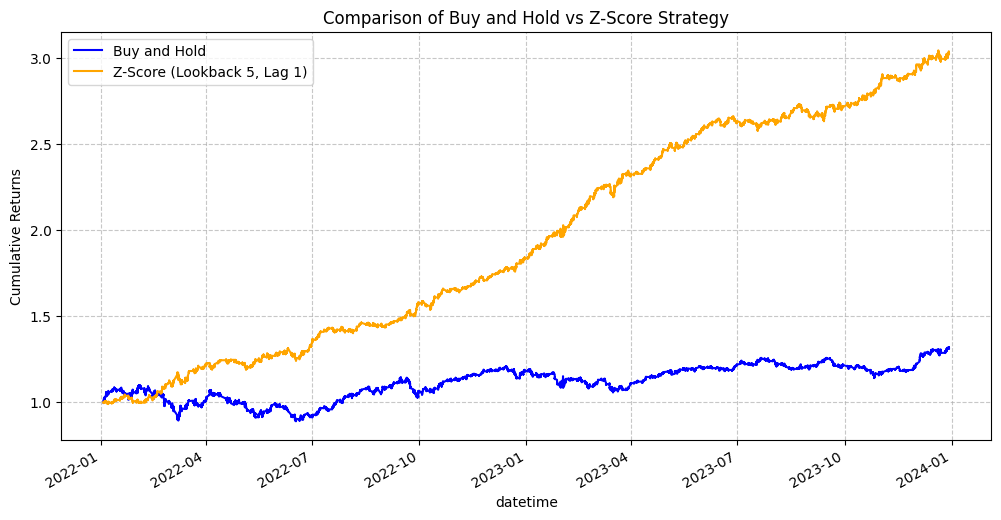

Buy and Hold Analytics:


{'Sharpe Ratio': 0.8,
 'Sortino Ratio': 0.9,
 'Max Drawdown': 0.12965808431875914,
 'VaR(95%)': -0.0006995033667622995,
 'Expected shortfall(95%)': -0.0011672569620413964,
 'Ann. return': 0.156,
 'Ann. vol': 0.175}

Z-Score Strategy Analytics:


{'Sharpe Ratio': 4.7,
 'Sortino Ratio': 3.7,
 'Max Drawdown': 0.012678256029973604,
 'VaR(95%)': -0.00046731588159482925,
 'Expected shortfall(95%)': -0.0008879674553260229,
 'Ann. return': 0.574,
 'Ann. vol': 0.119}

In [ ]:
# Compare with Buy and hold

# Define lookback window and lag
lookback_window = 5
lag = 1

# Buy-and-Hold Strategy: Simply holding the asset from the beginning to the end
buy_and_hold_returns = (1 + data['return']).cumprod()

# Z-Score Strategy Signal
_, z_sig_discrete, _ = zscore_signal(data, window=lookback_window)

# Apply the lag to the Z-Score signal
data['z_signal'] = pd.Series(z_sig_discrete, index=data.index).shift(lag).fillna(0)

# Z-Score Strategy Returns
zscore_strategy_returns = data['z_signal'] * data['return']

# Cumulative returns for Z-Score Strategy
cumulative_zscore_returns = (1 + zscore_strategy_returns).cumprod()

# Plot the comparison
plt.figure(figsize=(12, 6))
buy_and_hold_returns.plot(label='Buy and Hold', color='blue')
cumulative_zscore_returns.plot(label='Z-Score (Lookback 5, Lag 1)', color='orange')
plt.title('Comparison of Buy and Hold vs Z-Score Strategy')
plt.ylabel('Cumulative Returns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Optionally, display statistics
analytics_buy_and_hold = st.calculate_analytics(buy_and_hold_returns.pct_change().dropna())
analytics_zscore = st.calculate_analytics(zscore_strategy_returns.dropna())

print('Buy and Hold Analytics:')
display(analytics_buy_and_hold)
print('Z-Score Strategy Analytics:')
display(analytics_zscore)


### Z-Score export the trading signals

In [ ]:
# Export the trading signals to a CSV file
data[['z_signal']].to_csv('trading_signals.csv', index=True)

In [ ]:
from google.colab import files

# Download the CSV file
files.download('trading_signals.csv')

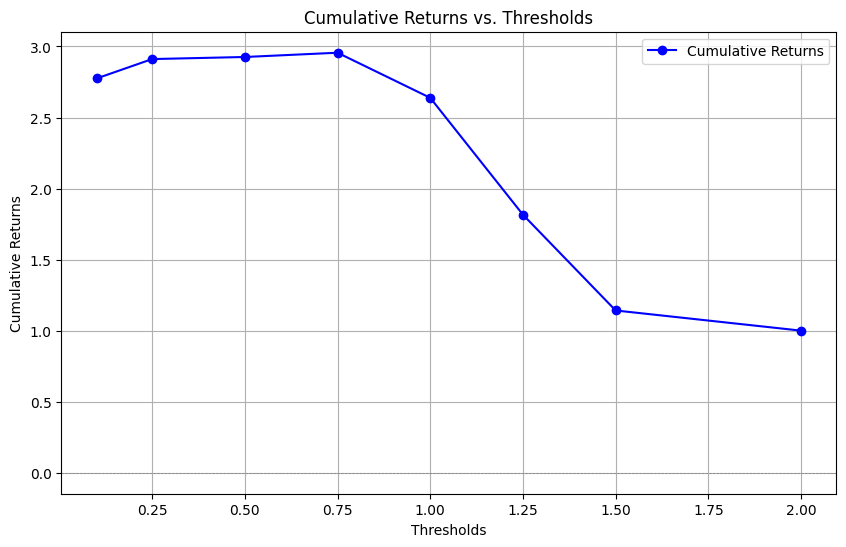

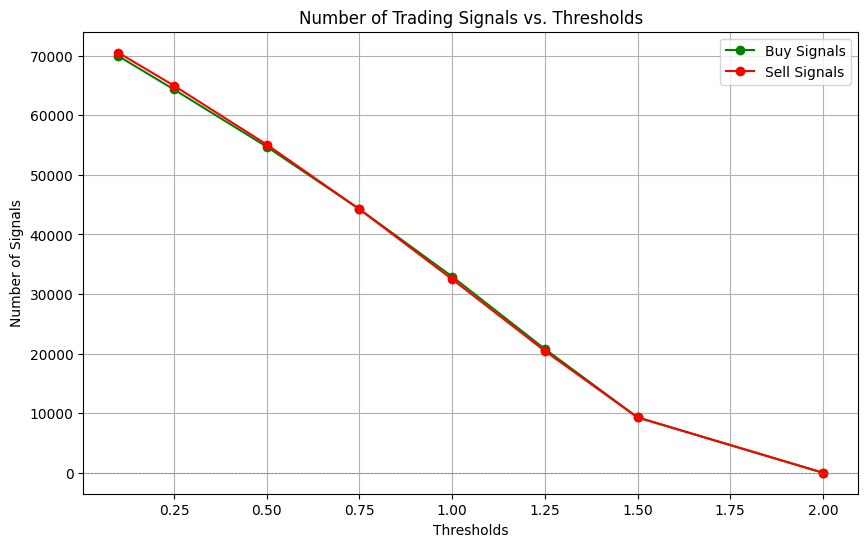

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def zscore_signal(data, window=5):
    # Calculate the rolling mean and standard deviation
    rolling_mean = data['close'].rolling(window=window).mean()
    rolling_std = data['close'].rolling(window=window).std()

    # Calculate Z-score
    zscore = (data['close'] - rolling_mean) / rolling_std
    return zscore


def test_zscore_threshold(data, lookback_window, lag, thresholds):
    results = []
    buy_and_hold_returns = (data['close'].pct_change()).cumsum()

    cumulative_returns_list = []
    buy_counts = []
    sell_counts = []

    for threshold in thresholds:
        # Generate Z-score signals
        zscore = zscore_signal(data, window=lookback_window)

        # Create signals based on threshold
        data['signal'] = 0
        data.loc[zscore > threshold, 'signal'] = -1  # Short when Z-score exceeds the positive threshold
        data.loc[zscore < -threshold, 'signal'] = 1  # Long when Z-score exceeds the negative threshold

        # Shift signals for realistic implementation
        data['signal'] = data['signal'].shift(lag).fillna(0)

        # Calculate strategy returns
        data['return'] = data['close'].pct_change()
        strategy_returns = data['signal'] * data['return']
        cumulative_returns = (1 + strategy_returns).cumprod()

        # Store cumulative returns for each threshold
        cumulative_returns_list.append(cumulative_returns.iloc[-1])

        # Count trading signals
        total_signals = data['signal'].value_counts()
        buy_signals_count = total_signals.get(1, 0)  # Count buy signals
        sell_signals_count = total_signals.get(-1, 0)  # Count sell signals

        buy_counts.append(buy_signals_count)
        sell_counts.append(sell_signals_count)

    # Plot cumulative returns vs. thresholds
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, cumulative_returns_list, marker='o', label='Cumulative Returns', color='blue')
    plt.title('Cumulative Returns vs. Thresholds')
    plt.xlabel('Thresholds')
    plt.ylabel('Cumulative Returns')
    plt.axhline(0, color='grey', lw=0.5, ls='--')  # Add horizontal line at 0
    plt.legend()
    plt.grid()
    plt.show()

    # Plot number of trading signals versus thresholds
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, buy_counts, marker='o', label='Buy Signals', color='green')
    plt.plot(thresholds, sell_counts, marker='o', label='Sell Signals', color='red')
    plt.title('Number of Trading Signals vs. Thresholds')
    plt.xlabel('Thresholds')
    plt.ylabel('Number of Signals')
    plt.axhline(0, color='grey', lw=0.5, ls='--')  # Add horizontal line at 0
    plt.legend()
    plt.grid()
    plt.show()

# Set your parameters
lookback_window = 5
lag = 1
thresholds = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]  # Symmetrical thresholds

# Test the Z-Score strategy against the Buy and Hold strategy
data = bank_nifty_f1.copy()
data_ins = data.iloc[:int(data.shape[0] * 0.8)].copy()  # Using 80% of the data for testing
zscore_results = test_zscore_threshold(data_ins, lookback_window, lag, thresholds)


### 3.3 RSI (Relative Strength Index) With Grid Search Machine Learning

Best RSI Parameters: {'window': 10, 'buy_threshold': 40, 'sell_threshold': 60, 'cumulative_return': 1.8910650412339143, 'sharpe_ratio': 0.1388549835763821}


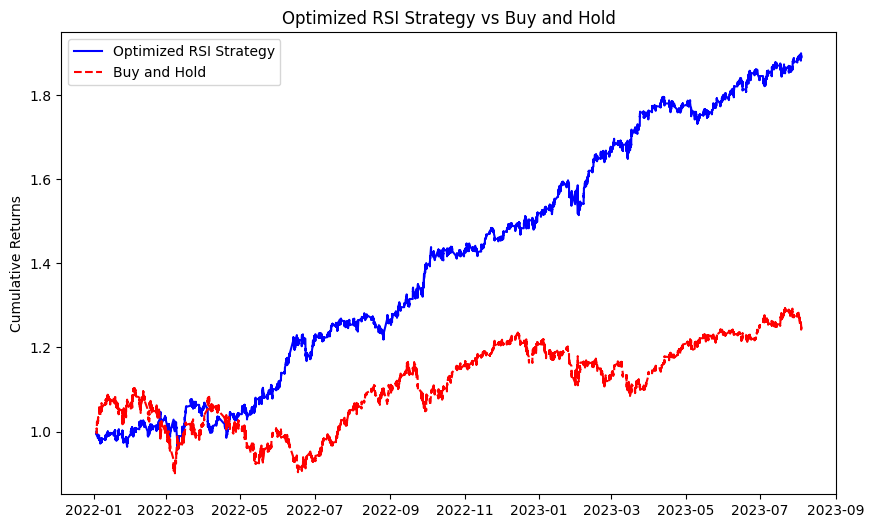

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# Define objective function to maximize cumulative returns and Sharpe ratio
def rsi_strategy_objective(params, data, lag=1):
    window = int(params['window'])
    buy_threshold = params['buy_threshold']
    sell_threshold = params['sell_threshold']

    # Generate RSI signals
    rsi = calculate_rsi(data, window=window)

    # Create signals based on thresholds
    data['signal'] = 0
    data.loc[rsi > sell_threshold, 'signal'] = -1  # Short when RSI exceeds sell_threshold
    data.loc[rsi < buy_threshold, 'signal'] = 1   # Long when RSI is below buy_threshold

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'] * data['return']  # Use the shifted signal
    cumulative_returns = (1 + strategy_returns).cumprod()

    # Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    return cumulative_returns.iloc[-1], sharpe_ratio

# Perform Grid Search to optimize thresholds and window
def optimize_rsi_strategy(data, lag=1):
    param_grid = {
        'window': [10, 14, 20],  # Different RSI windows
        'buy_threshold': [20, 30, 40],  # Buy RSI thresholds
        'sell_threshold': [60, 70, 80]  # Sell RSI thresholds
    }

    best_cum_returns = -np.inf
    best_params = None

    for window in param_grid['window']:
        for buy_threshold in param_grid['buy_threshold']:
            for sell_threshold in param_grid['sell_threshold']:
                cum_return, sharpe = rsi_strategy_objective({
                    'window': window,
                    'buy_threshold': buy_threshold,
                    'sell_threshold': sell_threshold
                }, data.copy(), lag)

                # Save the best results
                if cum_return > best_cum_returns:
                    best_cum_returns = cum_return
                    best_params = {
                        'window': window,
                        'buy_threshold': buy_threshold,
                        'sell_threshold': sell_threshold,
                        'cumulative_return': cum_return,
                        'sharpe_ratio': sharpe
                    }

    return best_params

# Apply the optimized RSI strategy using best parameters
def apply_rsi_strategy(data, window, buy_threshold, sell_threshold, lag=1):
    # Generate RSI signals
    rsi = calculate_rsi(data, window=window)

    # Create signals based on thresholds
    data['signal'] = 0
    data.loc[rsi > sell_threshold, 'signal'] = -1  # Sell signal
    data.loc[rsi < buy_threshold, 'signal'] = 1    # Buy signal

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate strategy returns
    data['return'] = data['close'].pct_change()
    data['strategy_return'] = data['signal'] * data['return']

    # Cumulative strategy returns
    cumulative_strategy_returns = (1 + data['strategy_return']).cumprod()

    return cumulative_strategy_returns

# Plot the optimized strategy's cumulative returns against Buy and Hold
def plot_strategy_vs_bh(data, cumulative_strategy_returns):
    # Buy and Hold returns
    cumulative_bh_returns = (1 + data['close'].pct_change()).cumprod()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_strategy_returns, label='Optimized RSI Strategy', color='blue')
    plt.plot(cumulative_bh_returns, label='Buy and Hold', linestyle='--', color='red')
    plt.title('Optimized RSI Strategy vs Buy and Hold')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()
data_ins = data.iloc[:int(data.shape[0] * 0.8)].copy()  # Using 80% of the data for testing

# Run optimization
best_rsi_params = optimize_rsi_strategy(data_ins)
print(f"Best RSI Parameters: {best_rsi_params}")

# Apply optimized RSI strategy
cumulative_strategy_returns = apply_rsi_strategy(
    data_ins,
    window=best_rsi_params['window'],
    buy_threshold=best_rsi_params['buy_threshold'],
    sell_threshold=best_rsi_params['sell_threshold'],
    lag=1
)

# Plot the strategy returns vs Buy and Hold
plot_strategy_vs_bh(data_ins, cumulative_strategy_returns)


### Export RSI Trading Singal (Debugged and running properly)

In [ ]:
from google.colab import files

# Download the CSV file
files.download('trading_signals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best RSI Parameters: {'window': 10, 'buy_threshold': 40, 'sell_threshold': 60, 'cumulative_return': 1.8910650412339143, 'sharpe_ratio': 0.1388549835763821}


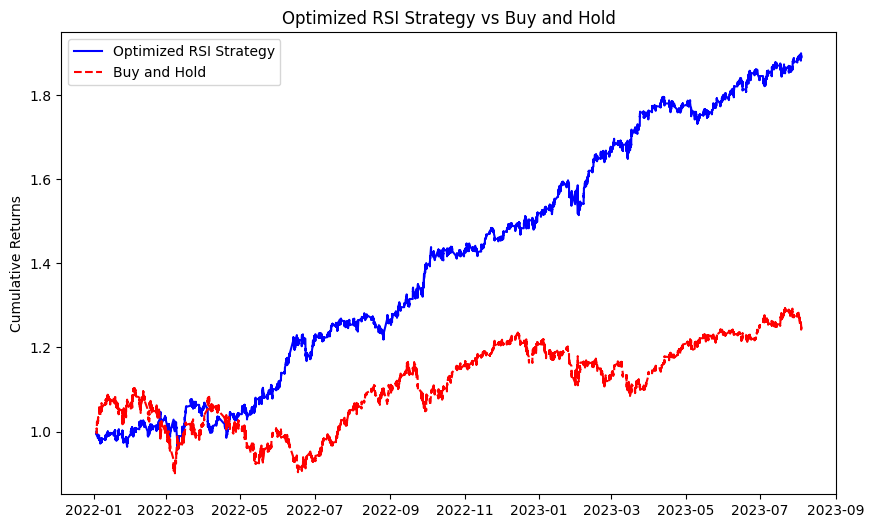

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files  # Only needed if running in Google Colab

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# Define objective function to maximize cumulative returns and Sharpe ratio
def rsi_strategy_objective(params, data, lag=1):
    window = int(params['window'])
    buy_threshold = params['buy_threshold']
    sell_threshold = params['sell_threshold']

    # Generate RSI signals
    rsi = calculate_rsi(data, window=window)

    # Create signals based on thresholds
    data['signal'] = 0
    data.loc[rsi > sell_threshold, 'signal'] = -1  # Short when RSI exceeds sell_threshold
    data.loc[rsi < buy_threshold, 'signal'] = 1   # Long when RSI is below buy_threshold

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'] * data['return']  # Use the shifted signal
    cumulative_returns = (1 + strategy_returns).cumprod()

    # Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    return cumulative_returns.iloc[-1], sharpe_ratio

# Perform Grid Search to optimize thresholds and window
def optimize_rsi_strategy(data, lag=1):
    param_grid = {
        'window': [10, 14, 20],  # Different RSI windows
        'buy_threshold': [20, 30, 40],  # Buy RSI thresholds
        'sell_threshold': [60, 70, 80]  # Sell RSI thresholds
    }

    best_cum_returns = -np.inf
    best_params = None

    for window in param_grid['window']:
        for buy_threshold in param_grid['buy_threshold']:
            for sell_threshold in param_grid['sell_threshold']:
                cum_return, sharpe = rsi_strategy_objective({
                    'window': window,
                    'buy_threshold': buy_threshold,
                    'sell_threshold': sell_threshold
                }, data.copy(), lag)

                # Save the best results
                if cum_return > best_cum_returns:
                    best_cum_returns = cum_return
                    best_params = {
                        'window': window,
                        'buy_threshold': buy_threshold,
                        'sell_threshold': sell_threshold,
                        'cumulative_return': cum_return,
                        'sharpe_ratio': sharpe
                    }

    return best_params

# Apply the optimized RSI strategy using best parameters
def apply_rsi_strategy(data, window, buy_threshold, sell_threshold, lag=1):
    # Generate RSI signals
    rsi = calculate_rsi(data, window=window)

    # Create signals based on thresholds
    data['signal'] = 0
    data.loc[rsi > sell_threshold, 'signal'] = -1  # Sell signal
    data.loc[rsi < buy_threshold, 'signal'] = 1    # Buy signal

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate strategy returns
    data['return'] = data['close'].pct_change()
    data['strategy_return'] = data['signal'] * data['return']

    # Cumulative strategy returns
    cumulative_strategy_returns = (1 + data['strategy_return']).cumprod()

    return cumulative_strategy_returns

# Export trading signals to a CSV file and download it
def export_trading_signals(data, filename='rsi_trading_signals.csv'):
    data[['signal']].to_csv(filename, index=True)
    files.download(filename)  # Only works in Google Colab

# Plot the optimized strategy's cumulative returns against Buy and Hold
def plot_strategy_vs_bh(data, cumulative_strategy_returns):
    # Buy and Hold returns
    cumulative_bh_returns = (1 + data['close'].pct_change()).cumprod()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_strategy_returns, label='Optimized RSI Strategy', color='blue')
    plt.plot(cumulative_bh_returns, label='Buy and Hold', linestyle='--', color='red')
    plt.title('Optimized RSI Strategy vs Buy and Hold')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()
data_ins = data.iloc[:int(data.shape[0] * 0.8)].copy()  # Using 80% of the data for testing

# Run optimization
best_rsi_params = optimize_rsi_strategy(data_ins)
print(f"Best RSI Parameters: {best_rsi_params}")

# Apply optimized RSI strategy
cumulative_strategy_returns = apply_rsi_strategy(
    data_ins,
    window=best_rsi_params['window'],
    buy_threshold=best_rsi_params['buy_threshold'],
    sell_threshold=best_rsi_params['sell_threshold'],
    lag=1
)

# Plot the strategy returns vs Buy and Hold
plot_strategy_vs_bh(data_ins, cumulative_strategy_returns)

# Export the trading signals to a CSV file and download it
export_trading_signals(data_ins)


### 3.4 Williams %R (Overbought/oversold)

Best Parameters: {'overbought': -20, 'oversold': -70, 'window': 10}
Best Cumulative Return: 2.5077602321893937
Best Sharpe Ratio: 0.18777524551060581
Max Drawdown: -0.058400322546727175
Number of Buy Signals: 54064
Number of Sell Signals: 38680
Average Buy Signals per Day: 109.6632860040568
Average Sell Signals per Day: 78.45841784989858


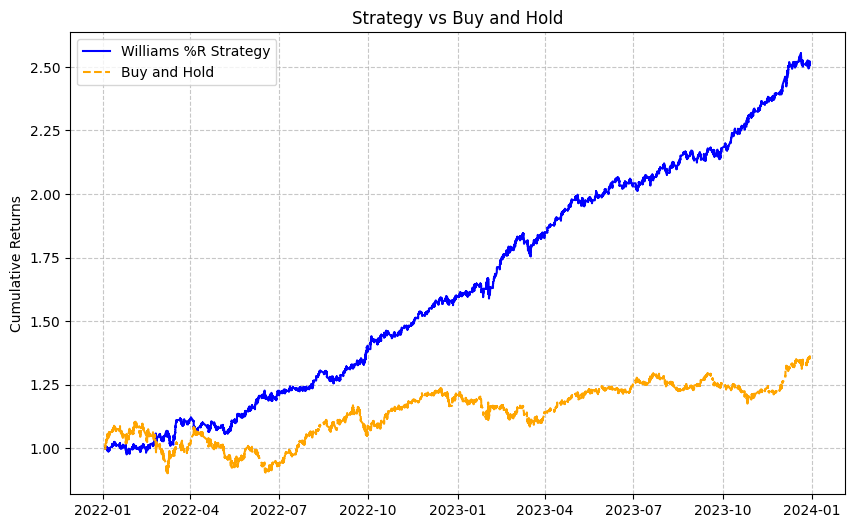

Sharpe Ratio with Best Params: 0.18777524551060581
Max Drawdown with Best Params: -0.058400322546727175
Number of Buy Signals with Best Params: 54064
Number of Sell Signals with Best Params: 38680
Average Buy Signals per Day with Best Params: 109.6632860040568
Average Sell Signals per Day with Best Params: 78.45841784989858


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

# Function to calculate Williams %R
def calculate_williams_r(data, window):
    high = data['high'].rolling(window=window).max()
    low = data['low'].rolling(window=window).min()
    williams_r = -100 * ((high - data['close']) / (high - low))
    return williams_r

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    if returns.std() == 0:
        return 0
    return returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# Function to calculate Max Drawdown
def calculate_max_drawdown(cumulative_returns):
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

# Function to calculate average buy/sell signals per day
def calculate_average_signals_per_day(data, num_buy_signals, num_sell_signals):
    data['date'] = pd.to_datetime(data.index).date  # Extract date if index is datetime
    trading_days = len(data['date'].unique())  # Count the number of unique trading days

    avg_buy_signals_per_day = num_buy_signals / trading_days
    avg_sell_signals_per_day = num_sell_signals / trading_days

    return avg_buy_signals_per_day, avg_sell_signals_per_day

# Williams %R Strategy
def williams_r_strategy(data, window, overbought=-20, oversold=-80, lag=1):
    data = data.copy()

    # Calculate Williams %R
    williams_r = calculate_williams_r(data, window=window)

    # Create trading signals
    data['signal'] = 0
    data.loc[williams_r < oversold, 'signal'] = 1  # Buy when oversold
    data.loc[williams_r > overbought, 'signal'] = -1  # Sell when overbought

    # Shift signals by the lag
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'] * data['return']
    cumulative_returns = (1 + strategy_returns).cumprod()

    # Calculate performance metrics
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
    max_drawdown = calculate_max_drawdown(cumulative_returns)

    # Count Buy and Sell signals
    num_buy_signals = (data['signal'] == 1).sum()
    num_sell_signals = (data['signal'] == -1).sum()

    # Calculate average buy/sell signals per day
    avg_buy_signals_per_day, avg_sell_signals_per_day = calculate_average_signals_per_day(data, num_buy_signals, num_sell_signals)

    return cumulative_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day

# Grid Search to find the best parameters
def optimize_williams_r_strategy(data, lag=1):
    # Define parameter grid
    param_grid = {
        'window': [10, 14, 20],  # Different windows for Williams %R
        'overbought': [-10, -20, -30],  # Overbought thresholds
        'oversold': [-70, -80, -90]  # Oversold thresholds
    }

    best_params = None
    best_cumulative_return = -np.inf
    best_sharpe_ratio = None
    best_max_drawdown = None
    best_num_buy_signals = None
    best_num_sell_signals = None
    best_avg_buy_signals_per_day = None
    best_avg_sell_signals_per_day = None

    # Iterate over parameter grid
    for params in ParameterGrid(param_grid):
        cumulative_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day = williams_r_strategy(
            data.copy(),
            window=params['window'],
            overbought=params['overbought'],
            oversold=params['oversold'],
            lag=lag
        )

        final_cumulative_return = cumulative_returns.iloc[-1]

        # Check if this set of parameters gives a better cumulative return
        if final_cumulative_return > best_cumulative_return:
            best_cumulative_return = final_cumulative_return
            best_params = params
            best_sharpe_ratio = sharpe_ratio
            best_max_drawdown = max_drawdown
            best_num_buy_signals = num_buy_signals
            best_num_sell_signals = num_sell_signals
            best_avg_buy_signals_per_day = avg_buy_signals_per_day
            best_avg_sell_signals_per_day = avg_sell_signals_per_day

    return best_params, best_cumulative_return, best_sharpe_ratio, best_max_drawdown, best_num_buy_signals, best_num_sell_signals, best_avg_buy_signals_per_day, best_avg_sell_signals_per_day

# Function to plot cumulative returns of strategy vs. buy and hold
def plot_strategy_vs_buy_hold(data, strategy_returns, title="Strategy vs Buy and Hold"):
    # Corrected buy and hold returns
    buy_and_hold_returns = (1 + data['close'].pct_change()).cumprod()
    plt.figure(figsize=(10, 6))
    plt.plot(strategy_returns, label='Williams %R Strategy', color='blue')
    plt.plot(buy_and_hold_returns, label='Buy and Hold', linestyle='--', color='orange')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylabel('Cumulative Returns')  # Annotate Y-axis as Cumulative Returns
    plt.legend()
    plt.show()

# Assuming 'bank_nifty_f1' contains 'high', 'low', and 'close' columns
data = bank_nifty_f1.copy()

# Ensure the required columns are present
assert 'high' in data.columns and 'low' in data.columns and 'close' in data.columns, \
    "Data must contain 'high', 'low', and 'close' columns"

# Run optimization
best_params, best_cumulative_return, best_sharpe_ratio, best_max_drawdown, best_num_buy_signals, best_num_sell_signals, best_avg_buy_signals_per_day, best_avg_sell_signals_per_day = optimize_williams_r_strategy(data)
print(f"Best Parameters: {best_params}")
print(f"Best Cumulative Return: {best_cumulative_return}")
print(f"Best Sharpe Ratio: {best_sharpe_ratio}")
print(f"Max Drawdown: {best_max_drawdown}")
print(f"Number of Buy Signals: {best_num_buy_signals}")
print(f"Number of Sell Signals: {best_num_sell_signals}")
print(f"Average Buy Signals per Day: {best_avg_buy_signals_per_day}")
print(f"Average Sell Signals per Day: {best_avg_sell_signals_per_day}")

# Test the strategy with the best parameters
cumulative_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day = williams_r_strategy(
    data,
    best_params['window'],
    best_params['overbought'],
    best_params['oversold']
)

# Plot the strategy performance
plot_strategy_vs_buy_hold(data, cumulative_returns)

# Print metrics
print(f"Sharpe Ratio with Best Params: {sharpe_ratio}")
print(f"Max Drawdown with Best Params: {max_drawdown}")
print(f"Number of Buy Signals with Best Params: {num_buy_signals}")
print(f"Number of Sell Signals with Best Params: {num_sell_signals}")
print(f"Average Buy Signals per Day with Best Params: {avg_buy_signals_per_day}")
print(f"Average Sell Signals per Day with Best Params: {avg_sell_signals_per_day}")


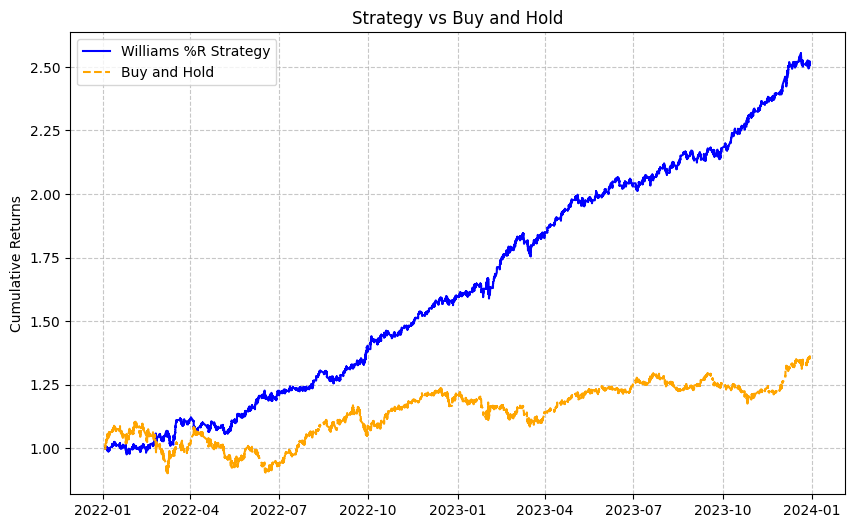

Sharpe Ratio with Best Params: 0.18777524551060581
Max Drawdown with Best Params: -0.058400322546727175
Number of Buy Signals with Best Params: 54064
Number of Sell Signals with Best Params: 38680
Average Buy Signals per Day with Best Params: 109.6632860040568
Average Sell Signals per Day with Best Params: 78.45841784989858
Error: 'signal' column not found in data.


In [ ]:
# Test the strategy with the best parameters
cumulative_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day = williams_r_strategy(
    data,
    best_params['window'],
    best_params['overbought'],
    best_params['oversold']
)

# Plot the strategy performance
plot_strategy_vs_buy_hold(data, cumulative_returns)

# Print metrics
print(f"Sharpe Ratio with Best Params: {sharpe_ratio}")
print(f"Max Drawdown with Best Params: {max_drawdown}")
print(f"Number of Buy Signals with Best Params: {num_buy_signals}")
print(f"Number of Sell Signals with Best Params: {num_sell_signals}")
print(f"Average Buy Signals per Day with Best Params: {avg_buy_signals_per_day}")
print(f"Average Sell Signals per Day with Best Params: {avg_sell_signals_per_day}")

# Ensure the signal column is still present before exporting
if 'signal' in data.columns:
    # Exporting trading signals to CSV
    signals_to_export = data[['signal']].copy()  # Copy the signals
    signals_to_export['datetime'] = data.index  # Add the datetime index as a column
    signals_to_export = signals_to_export[['datetime', 'signal']]  # Rearranging columns

    # Save to CSV
    signals_to_export.to_csv('trading_signals.csv', index=False)
    print("Trading signals exported to 'trading_signals.csv'.")
else:
    print("Error: 'signal' column not found in data.")

### Export Trading Signals

In [ ]:
from google.colab import files

# Download the CSV file
files.download('trading_signals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Williams %R (Overbought/oversold) In sample versus. out of Sample test

In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator  # Using 'ta' library's RSI

# Sample data preparation (replace with your actual 'bank_nifty_f1' DataFrame)
data = bank_nifty_f1.copy()

# Check if the index is a datetime index
if not pd.api.types.is_datetime64_any_dtype(data.index):
    raise TypeError("The index of the DataFrame must be of datetime type.")

# Calculate SMA and RSI directly on minute data
data['ma_50'] = data['close'].rolling(window=50).mean()  # 50-period SMA
rsi_indicator = RSIIndicator(close=data['close'], window=14)
data['rsi'] = rsi_indicator.rsi()

# Generate trading signals based on SMA and RSI
def generate_signals(row):
    if row['close'] > row['ma_50'] and row['rsi'] < 30:  # Bullish condition
        return 1  # Buy signal
    elif row['close'] < row['ma_50'] and row['rsi'] > 70:  # Bearish condition
        return -1  # Sell signal
    else:
        return 0  # Hold signal

data['signal'] = data.apply(generate_signals, axis=1)

# Export trading signals to CSV file
data[['signal']].to_csv('/content/multi_time_frame_trading_signals.csv', index=True)
print("Multi-time frame trading signals exported to 'multi_time_frame_trading_signals.csv'")


Multi-time frame trading signals exported to 'multi_time_frame_trading_signals.csv'


### 3.5 On Balance Volume (OBV)

####3.5.1 OBV Momentum Strategy

Best OBV Parameters: {'obv_threshold': 300, 'cumulative_return': 1.224324697811723, 'sharpe_ratio': 0.03509965463974501}


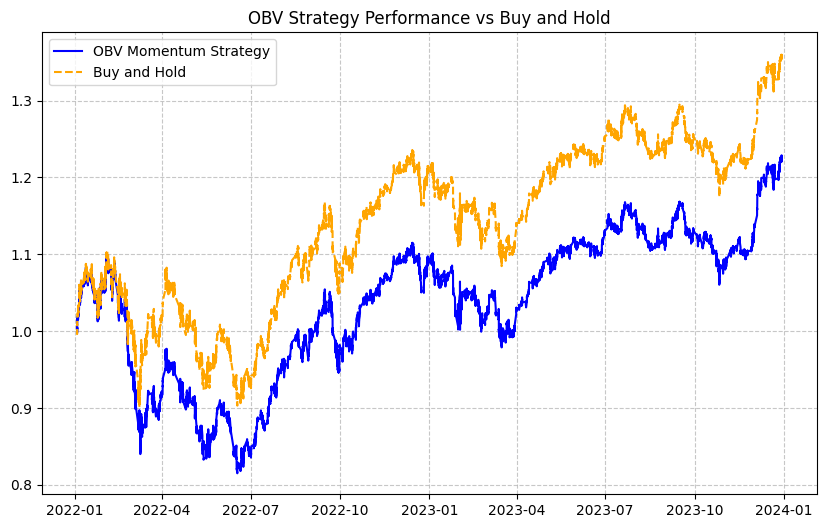

Sharpe Ratio: 0.04
Max Drawdown: -0.26
Number of Buy Signals: 183615
Number of Sell Signals: 982
Average Buy Signals Per Day: 372.44
Average Sell Signals Per Day: 1.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = np.zeros(len(data))
    for i in range(1, len(data)):
        if data['close'].iloc[i] > data['close'].iloc[i - 1]:
            obv[i] = obv[i - 1] + data['volume'].iloc[i]
        elif data['close'].iloc[i] < data['close'].iloc[i - 1]:
            obv[i] = obv[i - 1] - data['volume'].iloc[i]
        else:
            obv[i] = obv[i - 1]
    return obv

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# OBV Strategy
def obv_strategy(data, obv_threshold, lag=1):
    data = data.copy()

    # Calculate OBV
    data['obv'] = calculate_obv(data)

    # Create trading signals based on OBV threshold
    data['signal'] = 0
    data.loc[data['obv'] > obv_threshold, 'signal'] = 1  # Buy signal
    data.loc[data['obv'] < -obv_threshold, 'signal'] = -1  # Sell signal

    # Shift signals by the lag
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'] * data['return']
    cumulative_returns = (1 + strategy_returns).cumprod()

    # Calculate performance metrics
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    # Number of buy and sell signals
    num_buy_signals = (data['signal'] == 1).sum()
    num_sell_signals = (data['signal'] == -1).sum()

    # Average buy and sell signals per day
    unique_days = data.index.normalize().nunique()  # Use index if it's a datetime index
    avg_buy_signals_per_day = num_buy_signals / unique_days
    avg_sell_signals_per_day = num_sell_signals / unique_days

    # Max drawdown calculation
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min()

    return cumulative_returns, strategy_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day

# Define objective function to maximize cumulative returns
def obv_strategy_objective(params, data):
    obv_threshold = params['obv_threshold']
    cumulative_returns, _, sharpe_ratio, _, _, _, _, _ = obv_strategy(data, obv_threshold)
    return cumulative_returns.iloc[-1], sharpe_ratio

# Optimize OBV threshold
def optimize_obv_strategy(data):
    param_grid = {
        'obv_threshold': [100, 200, 300, 400, 500]  # Different OBV thresholds
    }

    best_cum_returns = -np.inf
    best_params = None

    for obv_threshold in param_grid['obv_threshold']:
        cum_return, sharpe = obv_strategy_objective({'obv_threshold': obv_threshold}, data.copy())

        # Save the best results
        if cum_return > best_cum_returns:
            best_cum_returns = cum_return
            best_params = {
                'obv_threshold': obv_threshold,
                'cumulative_return': cum_return,
                'sharpe_ratio': sharpe
            }

    return best_params

# Set your parameters
data = bank_nifty_f1.copy()

# Optimize the OBV strategy
best_obv_params = optimize_obv_strategy(data)
print(f"Best OBV Parameters: {best_obv_params}")

# Generate strategy returns and performance metrics with the best OBV threshold
cumulative_returns, strategy_returns, sharpe_ratio, max_drawdown, num_buy_signals, num_sell_signals, avg_buy_signals_per_day, avg_sell_signals_per_day = obv_strategy(data, best_obv_params['obv_threshold'])

# Calculate Buy-and-Hold returns
buy_and_hold_returns = (1 + data['close'].pct_change()).cumprod()

# Plot the strategy performance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='OBV Momentum Strategy', color='blue')
plt.plot(buy_and_hold_returns, label='Buy and Hold', linestyle='--', color='orange')
plt.title("OBV Strategy Performance vs Buy and Hold")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2f}")
print(f"Number of Buy Signals: {num_buy_signals}")
print(f"Number of Sell Signals: {num_sell_signals}")
print(f"Average Buy Signals Per Day: {avg_buy_signals_per_day:.2f}")
print(f"Average Sell Signals Per Day: {avg_sell_signals_per_day:.2f}")


###3.6 VWAP

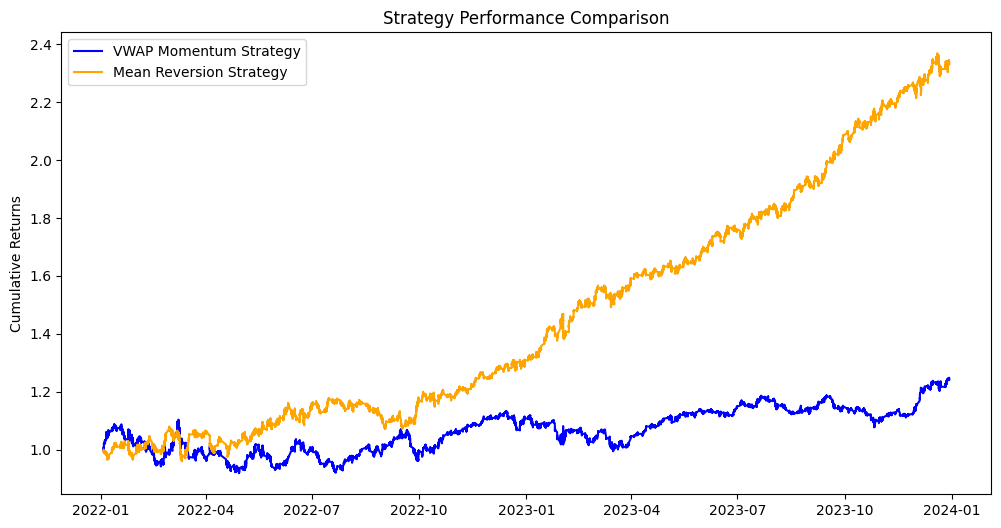

VWAP Momentum Sharpe Ratio: 0.04
Mean Reversion Sharpe Ratio: 0.13


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate VWAP
def calculate_vwap(data):
    vwap = (data['volume'] * data['close']).cumsum() / data['volume'].cumsum()
    return vwap

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# VWAP Momentum Strategy
def vwap_momentum_strategy(data):
    data = data.copy()

    # Calculate VWAP
    data['vwap'] = calculate_vwap(data)

    # Create trading signals
    data['signal'] = 0
    data.loc[data['close'] > data['vwap'], 'signal'] = 1  # Buy signal
    data.loc[data['close'] < data['vwap'], 'signal'] = -1  # Sell signal

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'].shift(1) * data['return']  # Shift signals by 1 day
    cumulative_returns_vwap = (1 + strategy_returns).cumprod()

    # Calculate performance metrics
    sharpe_ratio_vwap = calculate_sharpe_ratio(strategy_returns)

    return cumulative_returns_vwap, sharpe_ratio_vwap

# Mean Reversion Strategy using Simple Moving Average (SMA)
def mean_reversion_strategy(data, window=14):
    data = data.copy()

    # Calculate SMA
    data['sma'] = data['close'].rolling(window=window).mean()

    # Create trading signals
    data['signal'] = 0
    data.loc[data['close'] < data['sma'], 'signal'] = 1  # Buy signal
    data.loc[data['close'] > data['sma'], 'signal'] = -1  # Sell signal

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'].shift(1) * data['return']  # Shift signals by 1 day
    cumulative_returns_mean_reversion = (1 + strategy_returns).cumprod()

    # Calculate performance metrics
    sharpe_ratio_mean_reversion = calculate_sharpe_ratio(strategy_returns)

    return cumulative_returns_mean_reversion, sharpe_ratio_mean_reversion

# Set your parameters
data = bank_nifty_f1.copy()  # Assuming 'bank_nifty_f1' contains 'high', 'low', 'close', and 'volume'

# Generate strategy returns and performance metrics
cumulative_returns_vwap, sharpe_ratio_vwap = vwap_momentum_strategy(data)
cumulative_returns_mean_reversion, sharpe_ratio_mean_reversion = mean_reversion_strategy(data)

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_vwap, label='VWAP Momentum Strategy', color='blue')
plt.plot(cumulative_returns_mean_reversion, label='Mean Reversion Strategy', color='orange')
plt.title("Strategy Performance Comparison")
plt.ylabel('Cumulative Returns')  # Annotate Y-axis as Cumulative Returns
plt.legend()
plt.show()

# Print performance metrics
print(f"VWAP Momentum Sharpe Ratio: {sharpe_ratio_vwap:.2f}")
print(f"Mean Reversion Sharpe Ratio: {sharpe_ratio_mean_reversion:.2f}")


## Test Step 1: the importance of Trend Indicators

In [ ]:
pip install yfinance ta

Explained Variance by each component: [6.00195686e-01 2.04162120e-01 1.95620487e-01 2.08152154e-05
 8.91202661e-07]
                    PC1       PC2       PC3       PC4       PC5
EMA            0.577195 -0.013409 -0.002506 -0.443993 -0.685223
SMA            0.577192 -0.014106 -0.001781 -0.371396  0.727126
MACD           0.013276  0.710238 -0.703834 -0.001431  0.000785
ADX            0.019329  0.703584  0.710350 -0.000114 -0.000011
Parabolic_SAR  0.577188 -0.012382 -0.003312  0.815434 -0.041918
         Feature  Importance
2           MACD    0.277802
3            ADX    0.259982
4  Parabolic_SAR    0.176544
1            SMA    0.143555
0            EMA    0.142118
RMSE: 0.0005809896408695169


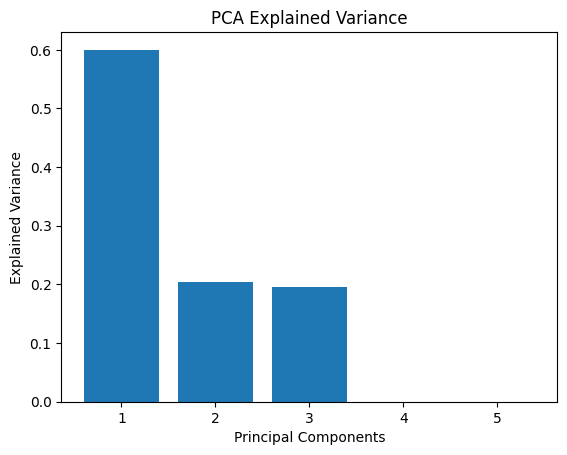

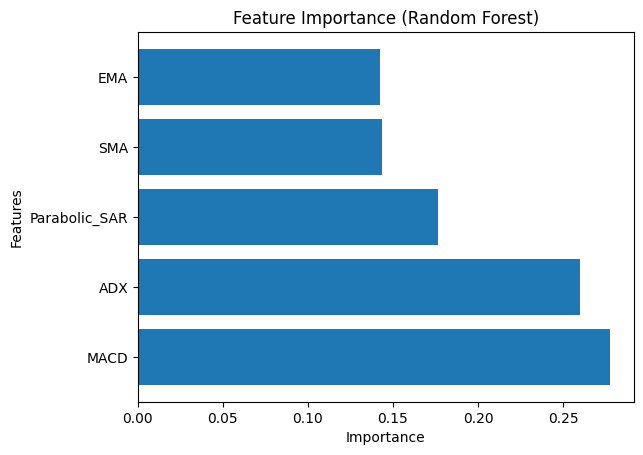

In [ ]:
# Step 1.1: Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1.2: Load the data

# Load your data
data = bank_nifty_f1.copy()


# Step 2: Calculate Technical Indicators


# Exponential Moving Average (EMA)
data['EMA'] = data['close'].ewm(span=20, adjust=False).mean()

# Simple Moving Average (SMA)
data['SMA'] = data['close'].rolling(window=20).mean()

# Moving Average Convergence Divergence (MACD)
exp1 = data['close'].ewm(span=12, adjust=False).mean()
exp2 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2

# Average Directional Index (ADX)
def calculate_adx(data, period=14):
    high = data['high']
    low = data['low']
    close = data['close']

    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0

    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    tr = pd.concat([tr1, tr2, tr3], axis=1, join='inner').max(axis=1)

    atr = tr.rolling(window=period).mean()
    plus_di = 100 * (plus_dm.rolling(window=period).mean() / atr)
    minus_di = 100 * (abs(minus_dm.rolling(window=period).mean()) / atr)

    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = dx.rolling(window=period).mean()

    return adx

data['ADX'] = calculate_adx(data)

# Parabolic SAR
from ta.trend import PSARIndicator
psar = PSARIndicator(high=data['high'], low=data['low'], close=data['close'], step=0.02, max_step=0.2)
data['Parabolic_SAR'] = psar.psar()



# Step 3: Create Target Variable

# Next Day's Return
data['Return_t+1'] = data['close'].pct_change().shift(-1)
data.dropna(inplace=True)


# Step 4: Standardize Data

# Select features (technical indicators) and target
features = ['EMA', 'SMA', 'MACD', 'ADX', 'Parabolic_SAR']
X = data[features]
y = data['Return_t+1']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Step 5: PCA for Dimensionality Reduction

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance by components
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')

# Loadings for each feature
loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])
print(loadings)



# Step 6: Train a Random Forest Model for Feature Importance

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

# Predictions and performance
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


# Step 6: Rank Indicators and Visualize Results

# Plot PCA Explained Variance
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot Random Forest Feature Importance
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



## Test Step 2:  Mean Reversion plus Trend Indicators

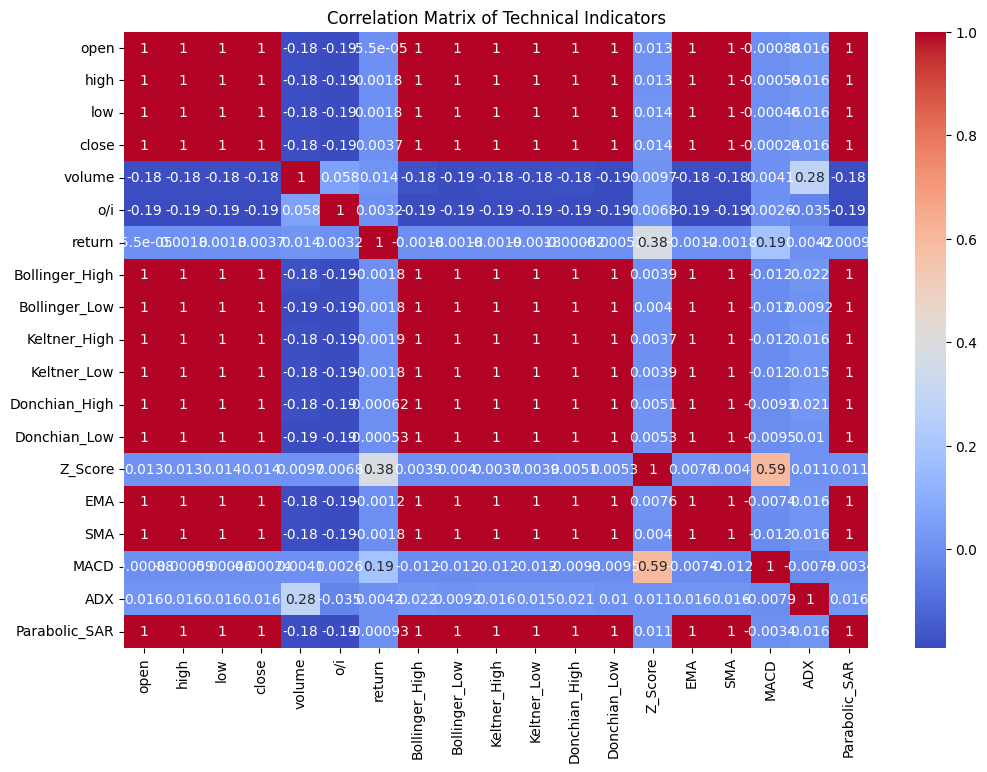

Highly correlated pairs:
open           high              0.999993
               low               0.999993
               close             0.999988
               Bollinger_High    0.999792
               Bollinger_Low     0.999803
                                   ...   
Parabolic_SAR  Keltner_Low       0.999933
               Donchian_High     0.999857
               Donchian_Low      0.999871
               EMA               0.999986
               SMA               0.999937
Length: 156, dtype: float64


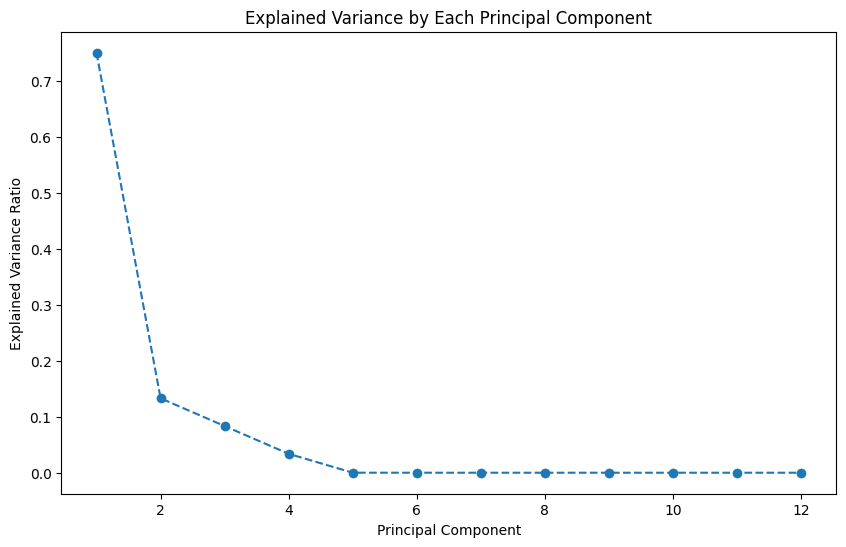

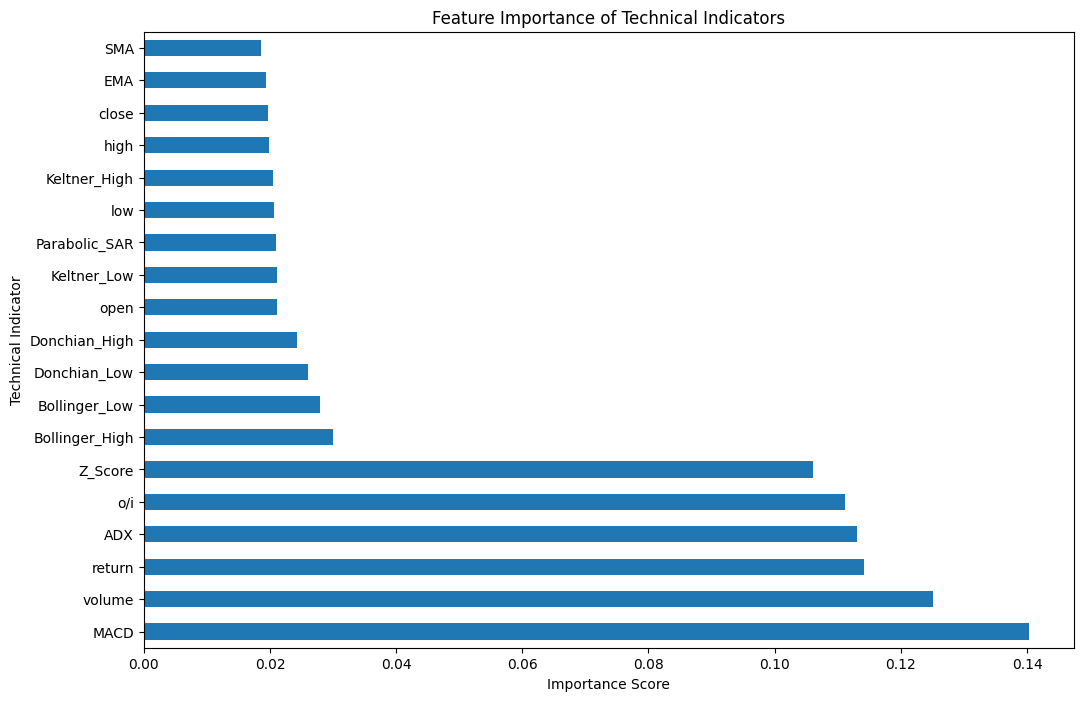

Feature Importances:
MACD              0.140392
volume            0.125056
return            0.114221
ADX               0.113065
o/i               0.111139
Z_Score           0.106146
Bollinger_High    0.029983
Bollinger_Low     0.028006
Donchian_Low      0.025985
Donchian_High     0.024365
open              0.021167
Keltner_Low       0.021062
Parabolic_SAR     0.020912
low               0.020657
Keltner_High      0.020441
high              0.019823
close             0.019642
EMA               0.019436
SMA               0.018502
dtype: float64


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
from ta.trend import EMAIndicator, SMAIndicator, MACD, ADXIndicator
from ta.volatility import BollingerBands, KeltnerChannel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = bank_nifty_f1.copy()  # Replace with your DataFrame

# Calculate technical indicators
def calculate_indicators(df):
    # Mean Reversion Indicators
    df['Bollinger_High'] = BollingerBands(df['close']).bollinger_hband()
    df['Bollinger_Low'] = BollingerBands(df['close']).bollinger_lband()
    df['Keltner_High'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_hband()
    df['Keltner_Low'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_lband()
    df['Donchian_High'] = df['high'].rolling(window=20).max()
    df['Donchian_Low'] = df['low'].rolling(window=20).min()
    df['Z_Score'] = (df['close'] - df['close'].rolling(window=20).mean()) / df['close'].rolling(window=20).std()

    # Trend Indicators
    df['EMA'] = EMAIndicator(close=df['close'], window=12).ema_indicator()
    df['SMA'] = SMAIndicator(close=df['close'], window=20).sma_indicator()
    macd = MACD(close=df['close'])
    df['MACD'] = macd.macd_diff()
    df['ADX'] = ADXIndicator(high=df['high'], low=df['low'], close=df['close']).adx()
    df['Parabolic_SAR'] = df['close'].rolling(window=5).mean()  # Use ta library's SAR if available

    # Drop NAs
    return df.dropna()

data = calculate_indicators(data)

# Select only numeric columns for analysis
numeric_data = data.select_dtypes(include=[np.number])

# Correlation analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

# Identify pairs with high correlations
high_corr_pairs = correlation_matrix.stack().loc[lambda x: abs(x) > 0.8]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
print("Highly correlated pairs:")
print(high_corr_pairs)

# PCA Analysis
indicators = numeric_data[['Bollinger_High', 'Bollinger_Low', 'Keltner_High', 'Keltner_Low', 'Donchian_High', 'Donchian_Low',
                           'Z_Score', 'EMA', 'SMA', 'MACD', 'ADX', 'Parabolic_SAR']]
scaler = StandardScaler()
indicators_scaled = scaler.fit_transform(indicators)

pca = PCA()
pca.fit(indicators_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Feature Importance Analysis with Random Forest
# Create target variable (future return)
data['future_return'] = data['close'].pct_change().shift(-1)
X = numeric_data.dropna()
y = data['future_return'].dropna()

# Align indices of X and y
X, y = X.align(y, join='inner', axis=0)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title('Feature Importance of Technical Indicators')
plt.xlabel('Importance Score')
plt.ylabel('Technical Indicator')
plt.show()

print("Feature Importances:")
print(feature_importance)


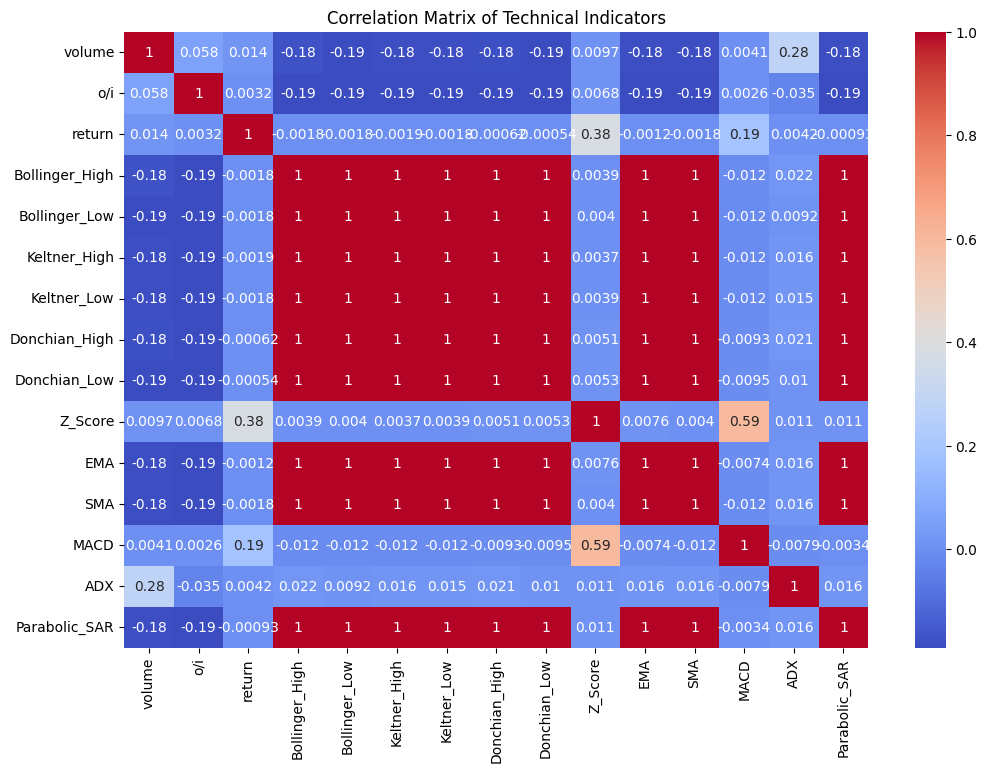

Highly correlated pairs:
Bollinger_High  Bollinger_Low    0.999572
                Keltner_High     0.999912
                Keltner_Low      0.999866
                Donchian_High    0.999957
                Donchian_Low     0.999638
                                   ...   
Parabolic_SAR   Keltner_Low      0.999933
                Donchian_High    0.999857
                Donchian_Low     0.999871
                EMA              0.999986
                SMA              0.999937
Length: 72, dtype: float64


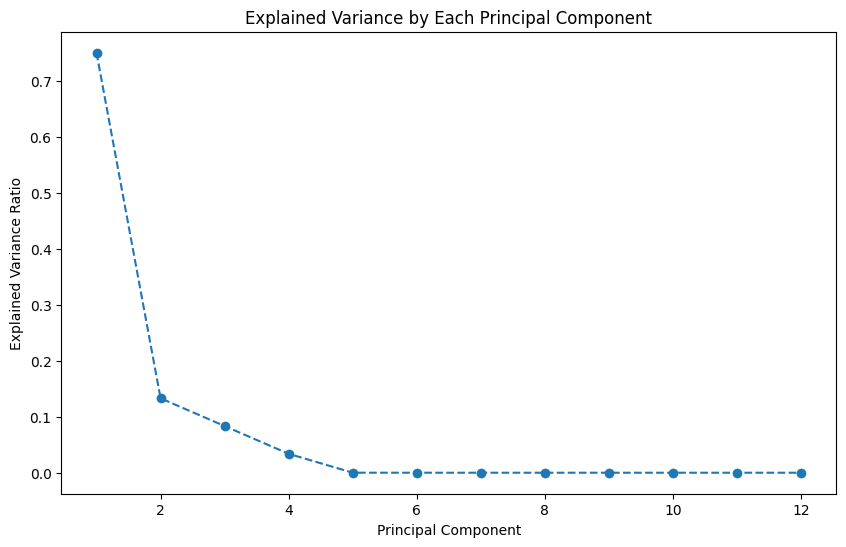

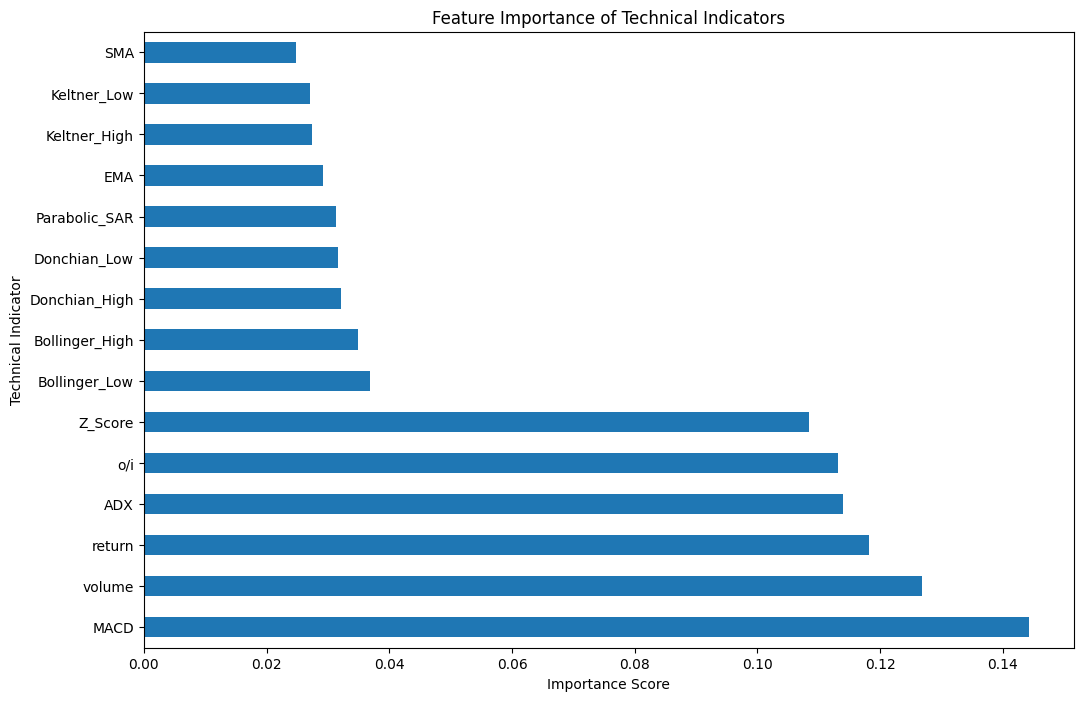

Feature Importances:
MACD              0.144322
volume            0.126879
return            0.118229
ADX               0.113878
o/i               0.113105
Z_Score           0.108363
Bollinger_Low     0.036874
Bollinger_High    0.034882
Donchian_High     0.032145
Donchian_Low      0.031631
Parabolic_SAR     0.031269
EMA               0.029164
Keltner_High      0.027374
Keltner_Low       0.027075
SMA               0.024810
dtype: float64


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
from ta.trend import EMAIndicator, SMAIndicator, MACD, ADXIndicator
from ta.volatility import BollingerBands, KeltnerChannel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = bank_nifty_f1.copy()  # Replace with your DataFrame

# Calculate technical indicators
def calculate_indicators(df):
    # Mean Reversion Indicators
    df['Bollinger_High'] = BollingerBands(df['close']).bollinger_hband()
    df['Bollinger_Low'] = BollingerBands(df['close']).bollinger_lband()
    df['Keltner_High'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_hband()
    df['Keltner_Low'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_lband()
    df['Donchian_High'] = df['high'].rolling(window=20).max()
    df['Donchian_Low'] = df['low'].rolling(window=20).min()
    df['Z_Score'] = (df['close'] - df['close'].rolling(window=20).mean()) / df['close'].rolling(window=20).std()

    # Trend Indicators
    df['EMA'] = EMAIndicator(close=df['close'], window=12).ema_indicator()
    df['SMA'] = SMAIndicator(close=df['close'], window=20).sma_indicator()
    macd = MACD(close=df['close'])
    df['MACD'] = macd.macd_diff()
    df['ADX'] = ADXIndicator(high=df['high'], low=df['low'], close=df['close']).adx()
    df['Parabolic_SAR'] = df['close'].rolling(window=5).mean()  # Use ta library's SAR if available

    # Drop NAs
    return df.dropna()

data = calculate_indicators(data)

# Select only numeric columns for analysis, excluding 'open', 'high', 'low', 'close'
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['open', 'high', 'low', 'close'], errors='ignore')

# Calculate return
data['return'] = data['close'].pct_change().shift(-1)
numeric_data = numeric_data.loc[data['return'].notna()]  # Ensure alignment with return

# Correlation analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

# Identify pairs with high correlations
high_corr_pairs = correlation_matrix.stack().loc[lambda x: abs(x) > 0.8]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
print("Highly correlated pairs:")
print(high_corr_pairs)

# PCA Analysis
indicators = numeric_data[['Bollinger_High', 'Bollinger_Low', 'Keltner_High', 'Keltner_Low',
                           'Donchian_High', 'Donchian_Low', 'Z_Score', 'EMA', 'SMA',
                           'MACD', 'ADX', 'Parabolic_SAR']]
scaler = StandardScaler()
indicators_scaled = scaler.fit_transform(indicators)

pca = PCA()
pca.fit(indicators_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Feature Importance Analysis with Random Forest
# Create target variable (future return)
y = data['return'].dropna()
X = numeric_data.loc[y.index]  # Align indices of X and y

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title('Feature Importance of Technical Indicators')
plt.xlabel('Importance Score')
plt.ylabel('Technical Indicator')
plt.show()

print("Feature Importances:")
print(feature_importance)


## Testing Step 3:  Effectiveness of Technical indicators using Lags

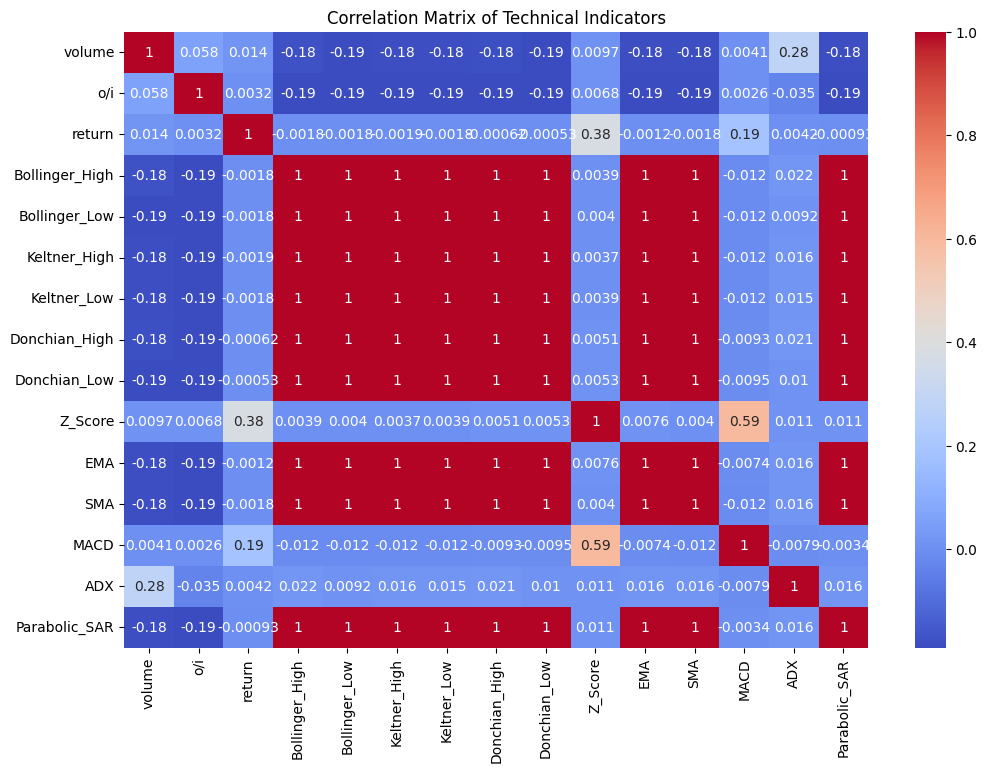

Highly correlated pairs:
Bollinger_High  Bollinger_Low    0.999572
                Keltner_High     0.999912
                Keltner_Low      0.999866
                Donchian_High    0.999957
                Donchian_Low     0.999638
                                   ...   
Parabolic_SAR   Keltner_Low      0.999933
                Donchian_High    0.999857
                Donchian_Low     0.999871
                EMA              0.999986
                SMA              0.999937
Length: 72, dtype: float64
PCA Components:
Component 1: Explained Variance Ratio = 0.7500
Component 2: Explained Variance Ratio = 0.1329
Component 3: Explained Variance Ratio = 0.0833
Component 4: Explained Variance Ratio = 0.0337
Component 5: Explained Variance Ratio = 0.0000
Component 6: Explained Variance Ratio = 0.0000
Component 7: Explained Variance Ratio = 0.0000
Component 8: Explained Variance Ratio = 0.0000
Component 9: Explained Variance Ratio = 0.0000
Component 10: Explained Variance Ratio = 0.0000

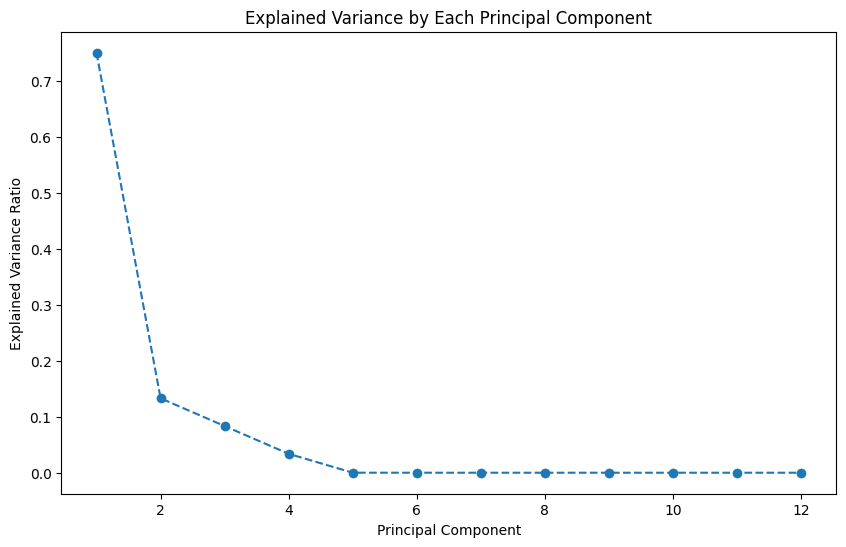

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
from ta.trend import EMAIndicator, SMAIndicator, MACD, ADXIndicator
from ta.volatility import BollingerBands, KeltnerChannel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = bank_nifty_f1.copy()

# Calculate technical indicators
def calculate_indicators(df):
    # Mean Reversion Indicators
    df['Bollinger_High'] = BollingerBands(df['close']).bollinger_hband()
    df['Bollinger_Low'] = BollingerBands(df['close']).bollinger_lband()
    df['Keltner_High'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_hband()
    df['Keltner_Low'] = KeltnerChannel(df['high'], df['low'], df['close']).keltner_channel_lband()
    df['Donchian_High'] = df['high'].rolling(window=20).max()
    df['Donchian_Low'] = df['low'].rolling(window=20).min()
    df['Z_Score'] = (df['close'] - df['close'].rolling(window=20).mean()) / df['close'].rolling(window=20).std()

    # Trend Indicators
    df['EMA'] = EMAIndicator(close=df['close'], window=12).ema_indicator()
    df['SMA'] = SMAIndicator(close=df['close'], window=20).sma_indicator()
    macd = MACD(close=df['close'])
    df['MACD'] = macd.macd_diff()
    df['ADX'] = ADXIndicator(high=df['high'], low=df['low'], close=df['close']).adx()
    df['Parabolic_SAR'] = df['close'].rolling(window=5).mean()  # Use ta library's SAR if available

    # Drop NAs
    return df.dropna()

data = calculate_indicators(data)

# Select only numeric columns for analysis, excluding 'open', 'high', 'low', 'close'
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['open', 'high', 'low', 'close'], errors='ignore')

# Calculate return with lags from 1 to 15 minutes
for lag in range(1, 16):
    data[f'return_lag_{lag}'] = data['close'].pct_change(lag).shift(-lag)

# Create a DataFrame to store return lags
returns = data[[f'return_lag_{lag}' for lag in range(1, 16)]].dropna()

# Correlation analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

# Identify pairs with high correlations
high_corr_pairs = correlation_matrix.stack().loc[lambda x: abs(x) > 0.8]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
print("Highly correlated pairs:")
print(high_corr_pairs)

# PCA Analysis
indicators = numeric_data[['Bollinger_High', 'Bollinger_Low', 'Keltner_High', 'Keltner_Low',
                           'Donchian_High', 'Donchian_Low', 'Z_Score', 'EMA', 'SMA',
                           'MACD', 'ADX', 'Parabolic_SAR']]
scaler = StandardScaler()
indicators_scaled = scaler.fit_transform(indicators)

pca = PCA()
pca.fit(indicators_scaled)
explained_variance = pca.explained_variance_ratio_

# Display PCA components
print("PCA Components:")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: Explained Variance Ratio = {var:.4f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Feature Importance Analysis with Random Forest using Grid Search for lags
results = {}
for lag in range(1, 16):
    y = data[f'return_lag_{lag}'].dropna()
    X = numeric_data.loc[y.index]  # Align indices of X and y

    # Train a Random Forest model with Grid Search
    model = RandomForestRegressor(random_state=42)
    param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

    grid_search.fit(X, y)

    # Get best score and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    results[lag] = {'best_score': best_score, 'best_params': best_params}

# Display Grid Search results for each lag
print("Grid Search Results for Return Lags:")
for lag, result in results.items():
    print(f"Lag {lag}: Best Score = {result['best_score']:.4f}, Best Parameters = {result['best_params']}")


## Testing Step 4: All technical indicators (excluding highly correlated ones):  

Bollinger_High Bollinger_Low

Keltner_High

Keltner_Low

Donchian_High Donchian_Low

Parabolic SAR Keltner_Low

Donchian_High

Donchian Low

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
from ta.trend import EMAIndicator, MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochasticOscillator, CCIIndicator, WilliamsRIndicator
from ta.volume import OnBalanceVolumeIndicator, ChaikinMoneyFlow
from ta.volatility import AverageTrueRange
from ta.volume import VolumeWeightedAveragePrice
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = bank_nifty_f1.copy()  # Testing data from Indian Stock Market Minute-level data

# Calculate technical indicators
def calculate_indicators(df):
    # Trend Indicators
    df['EMA'] = EMAIndicator(close=df['close'], window=12).ema_indicator()
    df['MACD'] = MACD(close=df['close']).macd_diff()
    df['ADX'] = ADXIndicator(high=df['high'], low=df['low'], close=df['close']).adx()

    # Oscillators
    df['RSI'] = RSIIndicator(close=df['close'], window=14).rsi()
    df['Stochastic_Oscillator'] = StochasticOscillator(high=df['high'], low=df['low'], close=df['close']).stoch()
    df['CCI'] = CCIIndicator(high=df['high'], low=df['low'], close=df['close'], window=20).cci()
    df['Williams_R'] = WilliamsRIndicator(high=df['high'], low=df['low'], close=df['close'], window=14).williams_r()
    df['MACD_Hist'] = MACD(close=df['close']).macd_diff() - MACD(close=df['close']).macd_signal()

    # Momentum and Volume Indicators
    df['OBV'] = OnBalanceVolumeIndicator(close=df['close'], volume=df['volume']).on_balance_volume()
    df['CMF'] = ChaikinMoneyFlow(high=df['high'], low=df['low'], close=df['close'], volume=df['volume'], window=20).chaikin_money_flow()
    df['VWAP'] = VolumeWeightedAveragePrice(high=df['high'], low=df['low'], close=df['close'], volume=df['volume']).vwap()
    df['ATR'] = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14).average_true_range()

    # Drop NAs
    return df.dropna()

data = calculate_indicators(data)

# Select only numeric columns for analysis, excluding 'open', 'high', 'low', 'close'
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['open', 'high', 'low', 'close'], errors='ignore')

# Calculate return with lags from 1 to 15 minutes
for lag in range(1, 16):
    data[f'return_lag_{lag}'] = data['close'].pct_change(lag).shift(-lag)

# Create a DataFrame to store return lags
returns = data[[f'return_lag_{lag}' for lag in range(1, 16)]].dropna()

# Quality Control: Check for missing values
print("Checking for missing values in numeric data:")
print(numeric_data.isnull().sum())

# Correlation analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

# Identify pairs with high correlations
high_corr_pairs = correlation_matrix.stack().loc[lambda x: abs(x) > 0.8]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
print("\nHighly correlated pairs:")
print(high_corr_pairs)

# PCA Analysis
indicators = numeric_data[['EMA', 'MACD', 'ADX', 'RSI', 'Stochastic_Oscillator',
                           'CCI', 'Williams_R', 'MACD_Hist', 'OBV', 'CMF',
                           'VWAP', 'ATR']]
scaler = StandardScaler()
indicators_scaled = scaler.fit_transform(indicators)

pca = PCA()
pca.fit(indicators_scaled)
explained_variance = pca.explained_variance_ratio_

# Display PCA components
print("\nPCA Components:")
for i in range(len(explained_variance)):
    print(f"Component {i + 1}: Explained Variance Ratio = {explained_variance[i]:.4f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Feature Importance Analysis with Random Forest using Grid Search for lags
results = {}
for lag in range(1, 16):
    y = data[f'return_lag_{lag}'].dropna()
    X = numeric_data.loc[y.index]  # Align indices of X and y

    # Train a Random Forest model with Grid Search
    model = RandomForestRegressor(random_state=42)
    param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

    grid_search.fit(X, y)

    # Get best score and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    results[lag] = {'best_score': best_score, 'best_params': best_params}

# Display Grid Search results for each lag
print("\nGrid Search Results for Return Lags:")
for lag, result in results.items():
    print(f"Lag {lag}: Best Score = {result['best_score']:.4f}, Best Parameters = {result['best_params']}")


# Remaining Indicators

MA, EMA, donchian channel, parabolic sar



In [ ]:
# Step 1.1: Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1.2: Load the data

# Load your data
data = bank_nifty_f1.copy()


# Step 2: Calculate Technical Indicators

# Exponential Moving Average (EMA)
data['EMA'] = data['close'].ewm(span=20, adjust=False).mean()

# Simple Moving Average (SMA)
data['SMA'] = data['close'].rolling(window=20).mean()

# Donchian Channel
data['Donchian_High'] = data['high'].rolling(window=20).max()
data['Donchian_Low'] = data['low'].rolling(window=20).min()
data['Donchian_Channel'] = (data['Donchian_High'] + data['Donchian_Low']) / 2

# Moving Average Convergence Divergence (MACD)
exp1 = data['close'].ewm(span=12, adjust=False).mean()
exp2 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2

# Average Directional Index (ADX)
def calculate_adx(data, period=14):
    high = data['high']
    low = data['low']
    close = data['close']

    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0

    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    tr = pd.concat([tr1, tr2, tr3], axis=1, join='inner').max(axis=1)

    atr = tr.rolling(window=period).mean()
    plus_di = 100 * (plus_dm.rolling(window=period).mean() / atr)
    minus_di = 100 * (abs(minus_dm.rolling(window=period).mean()) / atr)

    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = dx.rolling(window=period).mean()

    return adx

data['ADX'] = calculate_adx(data)

# Parabolic SAR
from ta.trend import PSARIndicator
psar = PSARIndicator(high=data['high'], low=data['low'], close=data['close'], step=0.02, max_step=0.2)
data['Parabolic_SAR'] = psar.psar()


# Step 3: Create Target Variable

# Next Day's Return
data['Return_t+1'] = data['close'].pct_change().shift(-1)
data.dropna(inplace=True)


# Step 4: Standardize Data

# Select features (technical indicators) and target
features = ['EMA', 'SMA', 'Donchian_Channel', 'MACD', 'ADX', 'Parabolic_SAR']
X = data[features]
y = data['Return_t+1']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 5: PCA for Dimensionality Reduction

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance by components
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')

# Loadings for each feature
loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])
print(loadings)


# Step 6: Train a Random Forest Model for Feature Importance

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

# Predictions and performance
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


# Step 6: Rank Indicators and Visualize Results

# Plot PCA Explained Variance
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot Random Forest Feature Importance
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
!pip install pandas-ta

### Parabolic SAR (PSAR) indicator

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Parabolic SAR
def calculate_parabolic_sar(data, step=0.02, max_step=0.2):
    high = data['high']
    low = data['low']
    close = data['close']

    psar = close.copy()  # Starting PSAR
    uptrend = True  # Start with an uptrend
    af = step  # Acceleration factor
    ep = low[0]  # Extreme point, starting with the low
    sar = low[0]  # Start SAR as the low

    for i in range(1, len(close)):
        if uptrend:
            sar = sar + af * (ep - sar)
            if high[i] > ep:
                ep = high[i]
                af = min(af + step, max_step)
            if low[i] < sar:
                uptrend = False
                sar = ep
                ep = low[i]
                af = step
        else:
            sar = sar + af * (ep - sar)
            if low[i] < ep:
                ep = low[i]
                af = min(af + step, max_step)
            if high[i] > sar:
                uptrend = True
                sar = ep
                ep = high[i]
                af = step
        psar[i] = sar
    return psar

# Define function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

# Define function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Define function to calculate Sortino Ratio
def calculate_sortino_ratio(returns, target_return=0):
    downside_returns = returns[returns < target_return]
    if downside_returns.empty:
        downside_deviation = 0
    else:
        downside_deviation = downside_returns.std()
    return (returns.mean() - target_return) / downside_deviation * np.sqrt(252)

# Define objective function to maximize cumulative returns and Sharpe ratio for reverse strategy
def reverse_psar_strategy_objective(params, data, lag=1):
    step = params['step']
    max_step = params['max_step']

    # Generate PSAR signals
    psar = calculate_parabolic_sar(data, step=step, max_step=max_step)

    # Create signals based on reverse PSAR logic
    data['signal'] = 0
    data.loc[data['close'] > psar, 'signal'] = -1   # Sell signal when price is above PSAR
    data.loc[data['close'] < psar, 'signal'] = 1    # Buy signal when price is below PSAR

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    strategy_returns = data['signal'] * data['return']  # Use the shifted signal
    cumulative_returns = (1 + strategy_returns).cumprod()

    # Sharpe Ratio, Sortino Ratio, and Maximum Drawdown
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
    sortino_ratio = calculate_sortino_ratio(strategy_returns)
    max_drawdown = calculate_max_drawdown(cumulative_returns)

    return cumulative_returns.iloc[-1], sharpe_ratio, sortino_ratio, max_drawdown

# Perform Grid Search to optimize reverse PSAR parameters
def optimize_reverse_psar_strategy(data, lag=1):
    param_grid = {
        'step': [0.02, 0.04, 0.06],  # Different PSAR steps
        'max_step': [0.1, 0.2, 0.3]  # Different PSAR max step values
    }

    best_cum_returns = -np.inf
    best_params = None

    for step in param_grid['step']:
        for max_step in param_grid['max_step']:
            cum_return, sharpe, sortino, max_dd = reverse_psar_strategy_objective({
                'step': step,
                'max_step': max_step
            }, data.copy(), lag)

            # Save the best results
            if cum_return > best_cum_returns:
                best_cum_returns = cum_return
                best_params = {
                    'step': step,
                    'max_step': max_step,
                    'cumulative_return': cum_return,
                    'sharpe_ratio': sharpe,
                    'sortino_ratio': sortino,
                    'max_drawdown': max_dd
                }

    return best_params

# Apply the optimized reverse PSAR strategy using best parameters
def apply_reverse_psar_strategy(data, step, max_step, lag=1):
    # Generate PSAR signals
    psar = calculate_parabolic_sar(data, step=step, max_step=max_step)

    # Create signals based on reverse PSAR logic
    data['signal'] = 0
    data.loc[data['close'] > psar, 'signal'] = -1   # Sell signal
    data.loc[data['close'] < psar, 'signal'] = 1    # Buy signal

    # Shift signals for realistic implementation
    data['signal'] = data['signal'].shift(lag).fillna(0)

    # Calculate strategy returns
    data['return'] = data['close'].pct_change()
    data['strategy_return'] = data['signal'] * data['return']

    # Cumulative strategy returns
    cumulative_strategy_returns = (1 + data['strategy_return']).cumprod()

    return cumulative_strategy_returns

# Plot the optimized reverse strategy's cumulative returns against Buy and Hold
def plot_reverse_strategy_vs_bh(data, cumulative_strategy_returns):
    # Buy and Hold returns
    cumulative_bh_returns = (1 + data['close'].pct_change()).cumprod()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_strategy_returns, label='Optimized Reverse PSAR Strategy', color='blue')
    plt.plot(cumulative_bh_returns, label='Buy and Hold', linestyle='--', color='red')
    plt.title('Optimized Reverse PSAR Strategy vs Buy and Hold')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()
data_ins = data.iloc[:int(data.shape[0] * 0.8)].copy()  # Using 80% of the data for testing

# Run optimization
best_reverse_psar_params = optimize_reverse_psar_strategy(data_ins)

# Print out performance metrics
print(f"Best Reverse PSAR Parameters: {best_reverse_psar_params}")
print(f"Sharpe Ratio: {best_reverse_psar_params['sharpe_ratio']:.4f}")
print(f"Sortino Ratio: {best_reverse_psar_params['sortino_ratio']:.4f}")
print(f"Max Drawdown: {best_reverse_psar_params['max_drawdown']:.4f}")

# Apply optimized reverse PSAR strategy
cumulative_strategy_returns = apply_reverse_psar_strategy(
    data_ins,
    step=best_reverse_psar_params['step'],
    max_step=best_reverse_psar_params['max_step'],
    lag=1
)

# Plot the strategy returns vs Buy and Hold
plot_reverse_strategy_vs_bh(data_ins, cumulative_strategy_returns)


##Donchian channel: Trend following

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Donchian Channel
def calculate_donchian_channel(data, window):
    data['upper_band'] = data['high'].rolling(window=window).max()
    data['lower_band'] = data['low'].rolling(window=window).min()
    return data

# Define function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() * np.sqrt(252)  # Assuming daily returns

# Define function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Define function to calculate Sortino Ratio
def calculate_sortino_ratio(returns, target_return=0):
    downside_returns = returns[returns < target_return]
    downside_deviation = downside_returns.std() if not downside_returns.empty else 0
    return (returns.mean() - target_return) / downside_deviation * np.sqrt(252) if downside_deviation != 0 else np.nan

# Backtest Enhanced Donchian Channel Strategy
def backtest_enhanced_donchian_channel(data, window):
    # Calculate Donchian Channel
    data = calculate_donchian_channel(data, window)

    # Create signals
    data['signal'] = 0
    data['position'] = 0  # To track current position: 1 = Long, -1 = Short

    # Generate signals
    for i in range(1, len(data)):
        # Buy signal: price crosses above upper band
        if data['close'].iloc[i] > data['upper_band'].iloc[i-1]:
            data['signal'].iloc[i] = 1  # Long position

        # Sell signal: price crosses below lower band
        elif data['close'].iloc[i] < data['lower_band'].iloc[i-1]:
            data['signal'].iloc[i] = -1  # Short position

        # No new signal, carry forward the last position
        else:
            data['signal'].iloc[i] = data['signal'].iloc[i-1]

    # Calculate positions based on signals
    data['position'] = data['signal'].replace(0, method='ffill')  # Forward fill positions

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['strategy_return'] = data['position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_strategy_returns'] = (1 + data['strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    # Calculate performance metrics
    sharpe_ratio = calculate_sharpe_ratio(data['strategy_return'].dropna())
    sortino_ratio = calculate_sortino_ratio(data['strategy_return'].dropna())
    max_dd = calculate_max_drawdown(data['cumulative_strategy_returns'])

    return data, sharpe_ratio, sortino_ratio, max_dd

# Plot results
def plot_results(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_strategy_returns'], label='Enhanced Donchian Channel Strategy', color='orange')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold Strategy', color='blue')
    plt.title('Comparison of Enhanced Donchian Channel Strategy vs Buy and Hold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()  # Ensure you have a DataFrame with 'high', 'low', 'close' columns
window = 20  # Window for the Donchian Channel

# Backtest the Enhanced Donchian Channel Strategy
results, sharpe, sortino, max_dd = backtest_enhanced_donchian_channel(data, window)

# Print performance metrics
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Sortino Ratio: {sortino:.4f}")
print(f"Max Drawdown: {max_dd:.4f}")

# Plot the strategy results
plot_results(results)


## Donchian Channel: Mean Reversion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Donchian Channel
def calculate_donchian_channel(data, window):
    data['upper_band'] = data['high'].rolling(window=window).max()
    data['lower_band'] = data['low'].rolling(window=window).min()
    return data

# Define function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() * np.sqrt(252)  # Assuming daily returns

# Define function to calculate maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Define function to calculate Sortino Ratio
def calculate_sortino_ratio(returns, target_return=0):
    downside_returns = returns[returns < target_return]
    downside_deviation = downside_returns.std() if not downside_returns.empty else 0
    return (returns.mean() - target_return) / downside_deviation * np.sqrt(252) if downside_deviation != 0 else np.nan

# Backtest Enhanced Donchian Channel Strategy
def backtest_enhanced_donchian_channel(data, window):
    # Calculate Donchian Channel
    data = calculate_donchian_channel(data, window)

    # Create signals
    data['signal'] = 0
    data['position'] = 0  # To track current position: 1 = Long, -1 = Short

    # Generate signals
    for i in range(1, len(data)):
        # Buy signal: price crosses above upper band
        if data['close'].iloc[i] > data['upper_band'].iloc[i-1]:
            data['signal'].iloc[i] = -1  # Long position

        # Sell signal: price crosses below lower band
        elif data['close'].iloc[i] < data['lower_band'].iloc[i-1]:
            data['signal'].iloc[i] = 1  # Short position

        # No new signal, carry forward the last position
        else:
            data['signal'].iloc[i] = data['signal'].iloc[i-1]

    # Calculate positions based on signals
    data['position'] = data['signal'].replace(0, method='ffill')  # Forward fill positions

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['strategy_return'] = data['position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_strategy_returns'] = (1 + data['strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    # Calculate performance metrics
    sharpe_ratio = calculate_sharpe_ratio(data['strategy_return'].dropna())
    sortino_ratio = calculate_sortino_ratio(data['strategy_return'].dropna())
    max_dd = calculate_max_drawdown(data['cumulative_strategy_returns'])

    return data, sharpe_ratio, sortino_ratio, max_dd

# Plot results
def plot_results(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_strategy_returns'], label='Enhanced Donchian Channel Strategy', color='orange')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold Strategy', color='blue')
    plt.title('Comparison of Enhanced Donchian Channel Strategy vs Buy and Hold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()  # Ensure you have a DataFrame with 'high', 'low', 'close' columns
window = 20  # Window for the Donchian Channel

# Backtest the Enhanced Donchian Channel Strategy
results, sharpe, sortino, max_dd = backtest_enhanced_donchian_channel(data, window)

# Print performance metrics
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Sortino Ratio: {sortino:.4f}")
print(f"Max Drawdown: {max_dd:.4f}")

# Plot the strategy results
plot_results(results)


## EMA and SMA with full data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate SMA strategy signals
def calculate_sma_signals(data, short_window, long_window):
    data['sma_short'] = data['close'].rolling(window=short_window).mean()
    data['sma_long'] = data['close'].rolling(window=long_window).mean()

    # Generate signals (1 = Buy, -1 = Sell, 0 = Hold)
    data['sma_signal'] = 0
    data['sma_signal'][short_window:] = np.where(data['sma_short'][short_window:] > data['sma_long'][short_window:], 1, -1)

    # Forward-fill the position (carry previous signals forward)
    data['sma_position'] = data['sma_signal'].replace(0, method='ffill')

    return data

# Function to calculate EMA strategy signals
def calculate_ema_signals(data, short_window, long_window):
    data['ema_short'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['close'].ewm(span=long_window, adjust=False).mean()

    # Generate signals (1 = Buy, -1 = Sell, 0 = Hold)
    data['ema_signal'] = 0
    data['ema_signal'][short_window:] = np.where(data['ema_short'][short_window:] > data['ema_long'][short_window:], 1, -1)

    # Forward-fill the position (carry previous signals forward)
    data['ema_position'] = data['ema_signal'].replace(0, method='ffill')

    return data

# Backtest SMA strategy
def backtest_sma_strategy(data, short_window, long_window):
    # Calculate signals
    data = calculate_sma_signals(data, short_window, long_window)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['sma_strategy_return'] = data['sma_position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_sma_strategy_returns'] = (1 + data['sma_strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    return data

# Backtest EMA strategy
def backtest_ema_strategy(data, short_window, long_window):
    # Calculate signals
    data = calculate_ema_signals(data, short_window, long_window)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['ema_strategy_return'] = data['ema_position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_ema_strategy_returns'] = (1 + data['ema_strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    return data

# Plot results
def plot_sma_vs_buy_and_hold(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_sma_strategy_returns'], label='SMA Strategy', color='orange')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold', color='blue')
    plt.title('Comparison of SMA Strategy vs Buy and Hold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

def plot_ema_vs_buy_and_hold(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_ema_strategy_returns'], label='EMA Strategy', color='green')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold', color='blue')
    plt.title('Comparison of EMA Strategy vs Buy and Hold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()  # Ensure you have a DataFrame with 'close' column
short_window = 50  # Short-term window
long_window = 200  # Long-term window

# Backtest SMA Strategy
data_sma = backtest_sma_strategy(data.copy(), short_window, long_window)
plot_sma_vs_buy_and_hold(data_sma)

# Backtest EMA Strategy
data_ema = backtest_ema_strategy(data.copy(), short_window, long_window)
plot_ema_vs_buy_and_hold(data_ema)

# Optional: Calculate and print Sharpe, Sortino, Max Drawdown for each strategy


## EMA and SMA with 80:20 Train/Test Split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate SMA strategy signals
def calculate_sma_signals(data, short_window, long_window):
    data['sma_short'] = data['close'].rolling(window=short_window).mean()
    data['sma_long'] = data['close'].rolling(window=long_window).mean()

    # Generate signals (1 = Buy, -1 = Sell, 0 = Hold)
    data['sma_signal'] = 0
    data['sma_signal'][short_window:] = np.where(data['sma_short'][short_window:] > data['sma_long'][short_window:], 1, -1)

    # Forward-fill the position (carry previous signals forward)
    data['sma_position'] = data['sma_signal'].replace(0, method='ffill')

    return data

# Function to calculate EMA strategy signals
def calculate_ema_signals(data, short_window, long_window):
    data['ema_short'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['close'].ewm(span=long_window, adjust=False).mean()

    # Generate signals (1 = Buy, -1 = Sell, 0 = Hold)
    data['ema_signal'] = 0
    data['ema_signal'][short_window:] = np.where(data['ema_short'][short_window:] > data['ema_long'][short_window:], 1, -1)

    # Forward-fill the position (carry previous signals forward)
    data['ema_position'] = data['ema_signal'].replace(0, method='ffill')

    return data

# Backtest SMA strategy
def backtest_sma_strategy(data, short_window, long_window):
    # Calculate signals
    data = calculate_sma_signals(data, short_window, long_window)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['sma_strategy_return'] = data['sma_position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_sma_strategy_returns'] = (1 + data['sma_strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    return data

# Backtest EMA strategy
def backtest_ema_strategy(data, short_window, long_window):
    # Calculate signals
    data = calculate_ema_signals(data, short_window, long_window)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['ema_strategy_return'] = data['ema_position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_ema_strategy_returns'] = (1 + data['ema_strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    return data

# Plot results for SMA strategy
def plot_sma_vs_buy_and_hold(data, title_suffix=''):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_sma_strategy_returns'], label='SMA Strategy', color='orange')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold', color='blue')
    plt.title(f'Comparison of SMA Strategy vs Buy and Hold {title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Plot results for EMA strategy
def plot_ema_vs_buy_and_hold(data, title_suffix=''):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_ema_strategy_returns'], label='EMA Strategy', color='green')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold', color='blue')
    plt.title(f'Comparison of EMA Strategy vs Buy and Hold {title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Train-test split function
def train_test_split(data, split_ratio=0.8):
    split_point = int(len(data) * split_ratio)
    train_data = data.iloc[:split_point].copy()
    test_data = data.iloc[split_point:].copy()
    return train_data, test_data

# Set your parameters
data = bank_nifty_f1.copy()  # Ensure you have a DataFrame with 'close' column
short_window = 50  # Short-term window
long_window = 200  # Long-term window

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, split_ratio=0.8)

# Backtest SMA Strategy on training data
train_data_sma = backtest_sma_strategy(train_data.copy(), short_window, long_window)
plot_sma_vs_buy_and_hold(train_data_sma, title_suffix='(Training Set)')

# Backtest SMA Strategy on test data
test_data_sma = backtest_sma_strategy(test_data.copy(), short_window, long_window)
plot_sma_vs_buy_and_hold(test_data_sma, title_suffix='(Test Set)')

# Backtest EMA Strategy on training data
train_data_ema = backtest_ema_strategy(train_data.copy(), short_window, long_window)
plot_ema_vs_buy_and_hold(train_data_ema, title_suffix='(Training Set)')

# Backtest EMA Strategy on test data
test_data_ema = backtest_ema_strategy(test_data.copy(), short_window, long_window)
plot_ema_vs_buy_and_hold(test_data_ema, title_suffix='(Test Set)')

# Optional: Calculate and print Sharpe, Sortino, Max Drawdown for each strategy


## EMA and SMA with Grid Search

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# Function to calculate SMA strategy signals
def calculate_sma_signals(data, short_window, long_window):
    data['sma_short'] = data['close'].rolling(window=short_window).mean()
    data['sma_long'] = data['close'].rolling(window=long_window).mean()

    # Generate signals (1 = Buy, -1 = Sell, 0 = Hold)
    data['sma_signal'] = 0
    data['sma_signal'][short_window:] = np.where(data['sma_short'][short_window:] > data['sma_long'][short_window:], 1, -1)

    # Forward-fill the position (carry previous signals forward)
    data['sma_position'] = data['sma_signal'].replace(0, method='ffill')

    return data

# Backtest SMA strategy
def backtest_sma_strategy(data, short_window, long_window):
    # Calculate signals
    data = calculate_sma_signals(data, short_window, long_window)

    # Calculate returns
    data['return'] = data['close'].pct_change()
    data['sma_strategy_return'] = data['sma_position'].shift(1) * data['return']  # Lag the position by 1 day

    # Calculate cumulative returns
    data['cumulative_sma_strategy_returns'] = (1 + data['sma_strategy_return']).cumprod()
    data['cumulative_buy_and_hold_returns'] = (1 + data['return']).cumprod()  # Buy and Hold Returns

    # Calculate Sharpe ratio (daily)
    sharpe_ratio = (data['sma_strategy_return'].mean() / data['sma_strategy_return'].std()) * np.sqrt(252)

    return data, sharpe_ratio

# Grid search for SMA strategy optimization
def grid_search_sma(train_data, short_range, long_range):
    best_sharpe = -np.inf  # Initialize best Sharpe ratio
    best_params = None
    best_train_data = None

    # Iterate over all combinations of short and long windows
    for short_window, long_window in product(short_range, long_range):
        # Make sure short_window < long_window
        if short_window >= long_window:
            continue

        # Backtest the strategy
        data, sharpe = backtest_sma_strategy(train_data.copy(), short_window, long_window)

        # Update best Sharpe ratio and parameters if current one is better
        if sharpe > best_sharpe:
            best_sharpe = sharpe
            best_params = (short_window, long_window)
            best_train_data = data.copy()  # Save the best strategy results

    return best_train_data, best_params, best_sharpe

# Train-test split function
def train_test_split(data, split_ratio=0.8):
    split_point = int(len(data) * split_ratio)
    train_data = data.iloc[:split_point].copy()
    test_data = data.iloc[split_point:].copy()
    return train_data, test_data

# Plot results for SMA strategy
def plot_sma_vs_buy_and_hold(data, title_suffix=''):
    plt.figure(figsize=(12, 6))
    plt.plot(data['cumulative_sma_strategy_returns'], label='SMA Strategy', color='orange')
    plt.plot(data['cumulative_buy_and_hold_returns'], label='Buy and Hold', color='blue')
    plt.title(f'Comparison of SMA Strategy vs Buy and Hold {title_suffix}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

# Set your parameters
data = bank_nifty_f1.copy()  # Ensure you have a DataFrame with 'close' column

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, split_ratio=0.8)

# Define ranges for grid search
short_range = range(10, 100, 10)  # Short window from 10 to 90
long_range = range(100, 300, 20)  # Long window from 100 to 280

# Perform grid search on training data
best_train_data, best_params, best_sharpe = grid_search_sma(train_data, short_range, long_range)

# Print the best parameters and Sharpe ratio
print(f"Best Parameters: Short Window = {best_params[0]}, Long Window = {best_params[1]}")
print(f"Best Sharpe Ratio on Training Set: {best_sharpe}")

# Plot the best SMA strategy on training data
plot_sma_vs_buy_and_hold(best_train_data, title_suffix=f'(Training Set, Best Short={best_params[0]}, Long={best_params[1]})')

# Backtest the best SMA strategy on test data
test_data_sma, test_sharpe = backtest_sma_strategy(test_data.copy(), best_params[0], best_params[1])

# Plot the results on the test set
plot_sma_vs_buy_and_hold(test_data_sma, title_suffix=f'(Test Set, Best Short={best_params[0]}, Long={best_params[1]})')
print(f"Sharpe Ratio on Test Set: {test_sharpe}")


## Data Backup into Github

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
bank_nifty_f1.to_csv('/content/drive/My Drive/bank_nifty_f1.csv', index=True)

# Pair Trading

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

# List of bank tickers to test against BANKNIFTY
bank_tickers = ['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'CANBK', 'FEDERALBNK',
                'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'KOTAKBANK', 'PNB',
                'RBLBANK', 'SBIN']

# Load BANKNIFTY data
bank_nifty_f1 = td.load_minutely_data(ticker='BANKNIFTY', filter='F1')
price_data = {'BANKNIFTY': bank_nifty_f1['close']}

# Initialize list to store correlation and co-integration results
results_list = []

# Load each bank's data and calculate correlation with BANKNIFTY
for ticker in bank_tickers:
    # Load data for each bank ticker
    bank_data = td.load_minutely_data(ticker=ticker, filter='F1')
    price_data[ticker] = bank_data['close']

    # Align data by timestamp
    merged_data = bank_nifty_f1[['close']].join(bank_data[['close']], lsuffix='_BANKNIFTY', rsuffix=f'_{ticker}')
    merged_data.dropna(inplace=True)

    # Calculate static correlation
    correlation = merged_data['close_BANKNIFTY'].corr(merged_data[f'close_{ticker}'])

    # Perform co-integration test (Engle-Granger two-step method)
    _, p_value, _ = coint(merged_data['close_BANKNIFTY'], merged_data[f'close_{ticker}'])

    # Store results in list
    results_list.append({
        'Ticker': ticker,
        'Correlation': correlation,
        'P-Value': p_value
    })

# Convert results to DataFrame
results = pd.DataFrame(results_list)

# Display and save correlation matrix as a heatmap
correlation_matrix = pd.DataFrame(price_data).corr()
print("Correlation Matrix for Quality Control:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap between BANKNIFTY and Bank Stocks")
plt.show()

# Identify pairs with high correlation and significant co-integration (e.g., p-value < 0.05)
significant_pairs = results[(results['Correlation'] > 0.8) & (results['P-Value'] < 0.05)]
print("Significant Correlated and Co-Integrated Pairs:")
print(significant_pairs)

# Save results to CSV
results.to_csv('banknifty_correlation_coint_results.csv', index=False)

# Plotting rolling correlation for each significant pair
window_size = 60  # Example window size in minutes for rolling correlation
for ticker in significant_pairs['Ticker']:
    # Calculate rolling correlation
    merged_data = bank_nifty_f1[['close']].join(td.load_minutely_data(ticker=ticker, filter='F1')[['close']],
                                                lsuffix='_BANKNIFTY', rsuffix=f'_{ticker}')
    merged_data.dropna(inplace=True)
    rolling_corr = merged_data['close_BANKNIFTY'].rolling(window=window_size).corr(merged_data[f'close_{ticker}'])

    # Plot the rolling correlation
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr, label=f'Rolling Correlation with {ticker}')
    plt.title(f'Rolling Correlation of BANKNIFTY and {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

# List of bank tickers to test against BANKNIFTY
bank_tickers = ['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'CANBK', 'FEDERALBNK',
                'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'KOTAKBANK', 'PNB',
                'RBLBANK', 'SBIN']

# Load BANKNIFTY data
bank_nifty_f1 = td.load_minutely_data(ticker='BANKNIFTY', filter='F1')
price_data = {'BANKNIFTY': bank_nifty_f1['close']}

# Initialize list to store correlation and co-integration results
results_list = []

# Load each bank's data and calculate correlation and cointegration with BANKNIFTY
for ticker in bank_tickers:
    # Load data for each bank ticker
    bank_data = td.load_minutely_data(ticker=ticker, filter='F1')
    price_data[ticker] = bank_data['close']

    # Align data by timestamp
    merged_data = bank_nifty_f1[['close']].join(bank_data[['close']], lsuffix='_BANKNIFTY', rsuffix=f'_{ticker}')
    merged_data.dropna(inplace=True)

    # Calculate static correlation
    correlation = merged_data['close_BANKNIFTY'].corr(merged_data[f'close_{ticker}'])

    # Perform co-integration test (Engle-Granger two-step method)
    coint_test = coint(merged_data['close_BANKNIFTY'], merged_data[f'close_{ticker}'])
    test_stat, p_value, crit_values = coint_test

    # Store results in list, including detailed cointegration metrics
    results_list.append({
        'Ticker': ticker,
        'Correlation': correlation,
        'Test Statistic': test_stat,
        'P-Value': p_value,
        'Critical Value (1%)': crit_values[0],
        'Critical Value (5%)': crit_values[1],
        'Critical Value (10%)': crit_values[2]
    })

# Convert results to DataFrame
results = pd.DataFrame(results_list)

# Display and save correlation matrix as a heatmap
correlation_matrix = pd.DataFrame(price_data).corr()
print("Correlation Matrix for Quality Control:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap between BANKNIFTY and Bank Stocks")
plt.show()

# Display the detailed cointegration results
print("Detailed Cointegration Results:")
print(results)

# Identify pairs with high correlation and significant co-integration (e.g., p-value < 0.05)
significant_pairs = results[(results['Correlation'] > 0.8) & (results['P-Value'] < 0.05)]
print("Significant Correlated and Co-Integrated Pairs:")
print(significant_pairs)

# Save results to CSV
results.to_csv('banknifty_correlation_coint_results.csv', index=False)

# Plotting rolling correlation for each significant pair
window_size = 60  # Example window size in minutes for rolling correlation
for ticker in significant_pairs['Ticker']:
    # Calculate rolling correlation
    merged_data = bank_nifty_f1[['close']].join(td.load_minutely_data(ticker=ticker, filter='F1')[['close']],
                                                lsuffix='_BANKNIFTY', rsuffix=f'_{ticker}')
    merged_data.dropna(inplace=True)
    rolling_corr = merged_data['close_BANKNIFTY'].rolling(window=window_size).corr(merged_data[f'close_{ticker}'])

    # Plot the rolling correlation
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr, label=f'Rolling Correlation with {ticker}')
    plt.title(f'Rolling Correlation of BANKNIFTY and {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize the pairs to test
pairs = [
    ('BANKNIFTY', 'AXISBANK'),
    ('BANKNIFTY', 'BANKBARODA'),
    ('BANKNIFTY', 'ICICIBANK'),
    ('AXISBANK', 'CANBK'),
    ('AXISBANK', 'BANKBARODA'),
    ('PNB', 'CANBK'),
    ('PNB', 'RBLBANK')
]

# Load data for each pair from your data source
def load_data(pairs):
    price_data = {}
    for ticker1, ticker2 in pairs:
        # Load data for each ticker only if not already loaded
        if ticker1 not in price_data:
            price_data[ticker1] = td.load_minutely_data(ticker=ticker1, filter='F1')['close']
        if ticker2 not in price_data:
            price_data[ticker2] = td.load_minutely_data(ticker=ticker2, filter='F1')['close']
    return price_data

# Perform cointegration and ADF tests for a trading pair
def cointegration_test(data, pair):
    # Align data by timestamp
    merged_data = pd.DataFrame({pair[0]: data[pair[0]], pair[1]: data[pair[1]]}).dropna()

    # Perform cointegration test
    score, p_value, crit_values = coint(merged_data[pair[0]], merged_data[pair[1]])

    # ADF test on the spread between the pair
    adf_result = sm.tsa.adfuller(merged_data[pair[0]] - merged_data[pair[1]])
    adf_stat = adf_result[0]
    adf_p_value = adf_result[1]
    adf_crit_values = adf_result[4]

    # Print details of the cointegration and ADF test
    print(f"\nCointegration test for {pair}:")
    print(f"  Cointegration p-value: {p_value:.4f}")
    print(f"  ADF Test statistic: {adf_stat:.4f}")
    print(f"  ADF p-value: {adf_p_value:.4f}")
    print(f"  ADF Critical Values: {adf_crit_values}")
    print(f"  Cointegration critical values: {crit_values}")

    return p_value, adf_p_value

# Load data
price_data = load_data(pairs)

# Run cointegration tests on each pair
for pair in pairs:
    cointegration_test(price_data, pair)
